<a href="https://colab.research.google.com/github/psa2001/U-Net-Convolutional-Networks-For-Biomedicalimage-Segmentation/blob/master/JustNOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt

from skimage.color import gray2rgb

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:

import tensorflow as tf
print(tf.__version__)


2.2.0-rc2


In [0]:
!ls

sample_data


In [0]:
!ls
#!touch MDL_che


sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive/'My Drive'/senukovs_a/senukova

/content/drive/My Drive/senukovs_a/senukova


In [0]:
!ls

 ALEX_note.ipynb
 comp2.h5
 data_ED_train_HCM_1try_64_9patiens.h5
 data_ED_train_HCM_2try_64.h5
 data_ES_60ex_2_8chan_5epochs.h5
 data_ES_train_HCM_1try_32.h5
 ED_with_dice_sq_loss_16_4try_10.h5
 ED_with_dice_sq_loss_32_3try_10
 ED_with_dice_sq_loss_32_3try_14pat.h5
 ED_with_dice_sq_loss_32_3try_20
 ED_with_dice_sq_loss_32_4try_20.h5
 ED_with_dice_sq_loss_32_4try_30.h5
 ES_with_dice_loss_32.h5
 ES_with_dice_sq_loss_16_5try__drop04_10.h5
 ES_with_dice_sq_loss_32_4try_10.h5
 MySubmission_0.csv
 MySubmission_0.gsheet
 MySubmission_1.csv
 MySubmission_1late.csv
 MySubmission_2late.csv
 MySubmission_333.csv
 MySubmission_9.csv
 MySubmission_onlyED.csv
 SampleSubmission.csv
 Test
 Train
 try_80
 trying_12_16.h5
 trying_12.h5
 trying_ED_drop01.h5
 trying_ED_gpu_drop01_2.h5
 trying_ED_gpu_drop01_3.h5
 trying_ED_gpu_drop01_4.h5
 trying_ED_gpu_drop01.h5
 trying_EDHCM_gpu_drop01_4.h5
 trying_EDRV_gpu_drop01_4.h5
 trying_ES_A_1.h5
 trying_ES_drop01.h5
 trying_ES_full_with7epochs_5circle.h5
 trying

Давайте загрузим и посмотрим на данные пациентов

In [0]:
PATH2PATIENT = 'Train/patient001'

In [0]:
def visualize(image_data):
    '''
    Функция для послойной визуализации МРТ-изображения.
    image_data: 3-х мерный numpy массив
    '''
    
    slices = image_data.shape[-1]
    
   
    
    addition = int(slices % 3 != 0)

    
    
    fig, ax = plt.subplots(slices // 3 + addition, 3, figsize=(20,20), gridspec_kw={'wspace':0.1, 'hspace':0.1})
    
    
    
    for i in range(slices // 3 + addition):
        for j in range(3):
            ax[i, j].axis("off")
            
    for i in range(slices):
        ax[i // 3, i % 3].set_title("Slice number:{}".format(i))
        ax[i // 3, i % 3].imshow(image_data[:, :, i], cmap='gray')

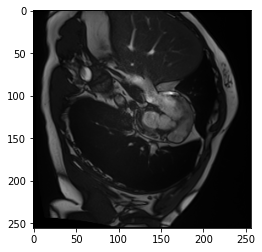

In [0]:

mri_image_path = os.path.join(PATH2PATIENT, 'patient001_frame01.nii')
# с помощью библиотеки nibabel загружаем МРТ-изображение
image = nib.load(mri_image_path)
# image - объект типа nibabel.Nifti1Image, 
# содержащий помимо самого изображения дополнителную мета информацию

image_data = image.get_fdata() 
# получаем непосредственно само изображение в градациях серого
# image_data - трёхмерный тензор   
# Визуализируем различные слои данного тензора по оси z


#visualize(image_data)
x = image_data[:,:,0]
fig, ax = plt.subplots()
ax.imshow(x, cmap='gray')
#image_data.shape

Теперь попробуем посмотреть, каким анатомическим структурам соответствует экспертная разметка

In [0]:
def create_painted_areas(mri_image_slice, labels_slice):
    '''
    Функция "раскраски" анатомических структур
    '''
    
    
    painted_image = gray2rgb(mri_image_slice)

    for label_value in range(1, 4):
        mask = labels_slice == label_value
        painted_image[mask, label_value - 1] = 255
    
    return painted_image / (painted_image.max()+ 1e-5)
            
def visualize_with_labels(image_data, labels_data):
    
    assert image_data.shape == labels_data.shape, "Shapes should be equals!"
    
    slices = image_data.shape[-1]
    addition = int(slices % 3 != 0)
        
    fig, ax = plt.subplots(slices // 3 + addition , 3, figsize=(20,20), gridspec_kw={'wspace':0.1, 'hspace':0.1})
    for i in range(slices // 3 + addition):
        for j in range(3):
            ax[i, j].axis('off')
            
    for i in range(slices):
    
        ax[i // 3, i % 3].set_title("Slice number:{}".format(i))
        painted_image = create_painted_areas(image_data[..., i], labels_data[..., i])
        ax[i // 3, i % 3].imshow(painted_image)

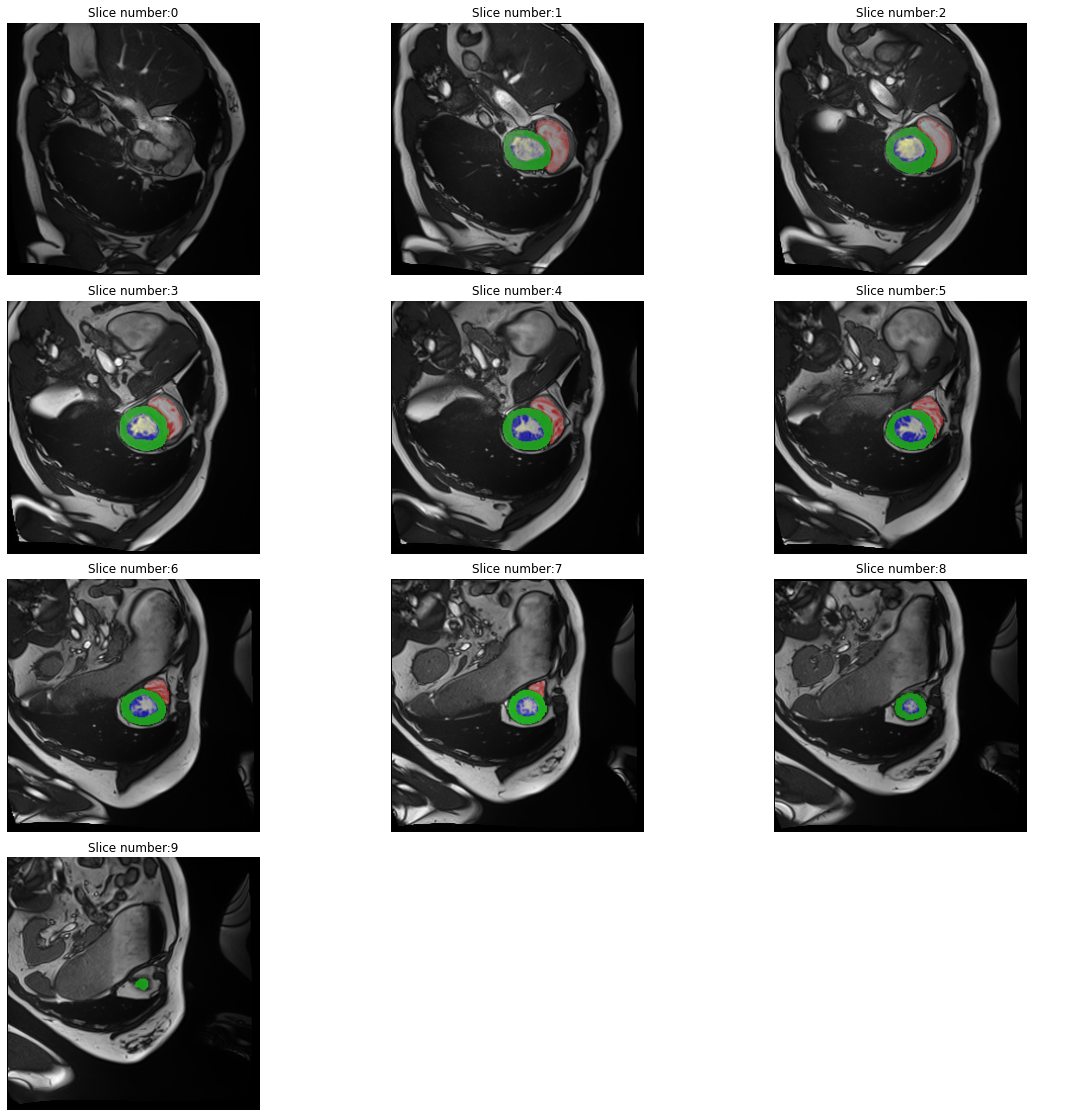

In [0]:
mri_image_path = os.path.join(PATH2PATIENT, 'patient001_frame01.nii')
labels_path = os.path.join(PATH2PATIENT, 'patient001_frame01_gt.nii')

mri_image = nib.load(mri_image_path).get_fdata()
labels = nib.load(labels_path).get_fdata()


#visualize(mri_image)
#visualize(labels)
#labels.shape

visualize_with_labels(mri_image, labels)

Некоторые вспомогательные функции, которые, возможно, понадобятся Вам для обработки изображений

In [0]:


def read_info_file(path2file):
    '''
    Функция для обработки Info.cfg.
    Возвращает словарь c параметрами пациента
    '''

    patient_info = {}
    with open(path2file, 'r') as f:
        for line in f:
            param_name, value = line.split(':')
            param_name, value = param_name.rstrip().lstrip(), value.rstrip().lstrip()
            patient_info[param_name] = value

    return patient_info
    
def gt_to_one_hot(gt_image, unique=[0, 1, 2, 3]):
    '''
    Функция для кодирования изображения в 
    one hot представление (скорее всего, понадобится при обучении)
    На вход: разметка для некоторого слоя (height, width)
    На выходе: 3-x мерный тензор (height, width, classes)
    (для данной задачи classes = 4)
    '''
    
    one_hot_gt = np.zeros(gt_image.shape + (len(unique),), dtype = np.uint8)
    for i, label in enumerate(unique):
        one_hot_gt[..., i] = (gt_image == label).astype(np.float32)
    
    return one_hot_gt

In [0]:
mas = {"RV"}

In [0]:
def load_dataset(dataset_directory, cycle_type='ES', is_train = True):
    '''
    Загрузка датасета в RAM.
    Возвращает список из кортежей вида (3D МРТ-изображение, Разметка, Имя пациента)
    В случае загрузки данных из тестовой выборки (is_train == False), 
    поле разметки в кортеже имеет значение None
    '''
    assert cycle_type == 'ES' or cycle_type == 'ED'
    g = "Group"
    dataset = []
    for patient_name in os.listdir(dataset_directory):
        patient_path = os.path.join(dataset_directory,patient_name)
        info_file_path = os.path.join(patient_path, 'Info.cfg')
        
        patient_info = read_info_file(info_file_path)
        frame_number = patient_info[cycle_type]
        image_name = '{}_frame{}.nii'.format(patient_name, frame_number.zfill(2))
        image_data = nib.load(os.path.join(patient_path, image_name)).get_fdata()
        
        if is_train:
            gt_name = '{}_frame{}_gt.nii'.format(patient_name, frame_number.zfill(2))
            gt_data = nib.load(os.path.join(patient_path, gt_name)).get_fdata()
        else:
            gt_data = None
        
        dataset.append((image_data, gt_data, patient_name,str(patient_info[g])))
    return dataset

In [0]:
def hot_back(mas) :
  back = np.zeros((256,256), dtype = np.float64)
  
  for i in range(256):
    
    for j in range(256):
      max_index = 0
      cur_max = 0
      for k in range(4):
        if(mas[i][j][k] > cur_max):
          max_index = k 
          cur_max = mas[i][j][k]
      back[i][j] = max_index 
  return back

In [0]:

#у них есть image_data и gt_data
data_ES_train = load_dataset('Train', 'ES', True)
data_ED_train = load_dataset('Train', 'ED', True)
len(data_ES_train)
print(data_ES_train[0][3])

DCM


In [0]:
data_ES_test = load_dataset('Test', 'ES', False)
data_ED_test = load_dataset('Test', 'ED', False)
len(data_ES_test)
print(data_ES_test[0][3])

DCM


In [0]:
def make_group(flag):
  data_set_ES = []
  data_set_ED = []
  k = 0
  for i in range(70):
      if(data_ES_train[i][3] == flag):
        k+=1
        data_set_ES.append((data_ES_train[i][0],data_ES_train[i][1],data_ES_train[i][2],data_ES_train[i][3]))
        data_set_ED.append((data_ED_train[i][0],data_ED_train[i][1],data_ED_train[i][2],data_ED_train[i][3]))
  return data_set_ES,data_set_ED

In [0]:
data_ES_train_RV, data_ED_train_RV = make_group('RV')
data_ES_train_HCM, data_ED_train_HCM = make_group('HCM')
data_ES_train_NOR, data_ED_train_NOR = make_group('NOR')
data_ES_train_DCM, data_ED_train_DCM = make_group('DCM')
data_ES_train_MINF, data_ED_train_MINF = make_group('MINF')
print(len(data_ES_train_MINF))

17


In [0]:

print(data_ES_train[0][2])

patient066


In [0]:

import tensorflow as tf

In [0]:
print(tf.__version__)


2.2.0-rc2


In [0]:
import logging 
from keras.models import Sequential

from keras import losses
from keras import metrics

from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

import keras.backend as K


import tensorflow as tf


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import multi_gpu_model


In [0]:
from keras import backend as keras

from keras.models import *
from keras.layers import *
from keras.optimizers import *


In [0]:
def unet_mod():
    input_img = Input(shape = (256, 256, 1))

    const1 = 8



    #Step1
    conv1 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(input_img)
    conv1 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(conv1)
    drop1 = Dropout(0.1)(conv1)
    pool1 = MaxPooling2D(pool_size = (2,2))(drop1)
    # Step 2
    const1 = const1 * 2
    conv2 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(pool1)
    conv2 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(conv2)
    drop2 = Dropout(0.1)(conv2)
    pool2 = MaxPooling2D(pool_size = (2,2))(drop2)
    # Step 3
    const1 = const1 * 2
    conv3 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(pool2)
    conv3 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(conv3)
    drop3 = Dropout(0.1)(conv3)
    pool3 = MaxPooling2D(pool_size = (2,2))(drop3)
    # Step 4
    const1 = const1 * 2
    conv4 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(pool3)
    conv4 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(conv4)
    drop4 = Dropout(0.1)(conv4)
    pool4 = MaxPooling2D(pool_size = (2,2))(drop4)
    
    # Step 5
    const1 = const1 * 2
    conv5 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(pool4)
    conv5 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(conv5)
    drop5 = Dropout(0.1)(conv5)
    pool5 = MaxPooling2D(pool_size = (2,2))(drop5)
     
    #Step6
    const1 = const1 * 2
    conv6 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(pool5)
    conv6 = Conv2D(const1, (3,3), activation = 'relu', padding = 'same', kernel_initializer = he_normal())(conv6)
    drop6 = Dropout(0.1)(conv6)
    


    #step0
    const1 = const1//2
    up0 = Conv2D(const1, 2, activation = 'relu', padding = 'same', kernel_initializer = he_normal())(UpSampling2D(size = (2,2))(drop6))
    conc0 = concatenate([conv5, up0], axis = 3)
    conv0 = Conv2D(const1, (3,3), activation = 'relu', padding = "same", kernel_initializer = he_normal())(conc0)
    conv0 = Conv2D(const1, (3,3), activation = "relu", padding = "same", kernel_initializer = he_normal())(conv0)
    drop0 = Dropout(0.1)(conv0)
    
    # Step 1
    const1 = const1//2
    up1 = Conv2D(const1, 2, activation = 'relu', padding = 'same', kernel_initializer = he_normal())(UpSampling2D(size = (2,2))(drop0))
    conc1 = concatenate([conv4, up1], axis = 3)
    conv6 = Conv2D(const1, (3,3), activation = 'relu', padding = "same", kernel_initializer = he_normal())(conc1)
    conv6 = Conv2D(const1, (3,3), activation = "relu", padding = "same", kernel_initializer = he_normal())(conv6)
    drop6 = Dropout(0.1)(conv6)
    
    # Step 2

    const1 = const1//2
    up2 = Conv2D(const1, 2, activation = 'relu', padding = 'same', kernel_initializer = he_normal())(UpSampling2D(size = (2,2))(drop6))
    conc2 = concatenate([conv3, up2], axis = 3)
    conv7 = Conv2D(const1, (3,3), activation = 'relu', padding = "same", kernel_initializer = he_normal())(conc2)
    conv7 = Conv2D(const1, (3,3), activation = "relu", padding = "same", kernel_initializer = he_normal())(conv7)
    drop7 = Dropout(0.1)(conv7)
    # Step 3
    const1 = const1//2
    up3 = Conv2D(const1, 2, activation = 'relu', padding = 'same', kernel_initializer = he_normal())(UpSampling2D(size = (2,2))(drop7))
    conc3 = concatenate([conv2, up3], axis = 3)
    conv8 = Conv2D(const1, (3,3), activation = 'relu', padding = "same", kernel_initializer = he_normal())(conc3)
    conv8 = Conv2D(const1, (3,3), activation = "relu", padding = "same", kernel_initializer = he_normal())(conv8)
    drop8 = Dropout(0.1)(conv8)
    # Step 4
    const1 = const1//2
    up4 = Conv2D(const1, 2, activation = 'relu', padding = 'same', kernel_initializer = he_normal())(UpSampling2D(size = (2,2))(drop8))
    conc4 = concatenate([conv1, up4], axis = 3)
    conv9 = Conv2D(const1, (3,3), activation = 'relu', padding = "same", kernel_initializer = he_normal())(conc4)
    conv9 = Conv2D(const1, (3,3), activation = "relu", padding = "same", kernel_initializer = he_normal())(conv9)

    conv10 = Conv2D(4, 1, activation = 'softmax')(conv9)
    
    print(conv10.shape)

    model = Model(input_img, conv10)    
    
    return model 

In [0]:
def tversky_loss(y_true, y_pred,belta = 0):
  numerator = tf.reduce_sum(y_true * y_pred, axis=-1)
  denominator = y_true * y_pred + belta * (1 - y_true) * y_pred + (1 - belta) * y_true * (1 - y_pred)
  return   (numerator + 1) / (tf.reduce_sum(denominator, axis=-1) + 1)


def tversky_coef_multilabel(y_true, y_pred, numLabels=4):
  dice=0
  dice -= tversky_loss(y_true[0,:,:,0], y_pred[0,:,:,0])
  dice -= tversky_loss(y_true[0,:,:,1], y_pred[0,:,:,1])
  dice -= tversky_loss(y_true[0,:,:,2], y_pred[0,:,:,2])
  dice -= tversky_loss(y_true[0,:,:,3], y_pred[0,:,:,3])
  return dice 

In [0]:
from tensorflow.keras.losses import categorical_crossentropy


def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return -((2. * intersection + smooth) / (K.sum((y_true * y_true),-1) + K.sum((y_pred * y_pred),-1) + smooth))

def dice_coef0(y_true, y_pred, numLabels=4):
  dice = 0
  y_true = tf.cast(y_true, tf.float32)
  dice = dice_coef(y_true[:,:,:,0], y_pred[:,:,:,0])
  return tf.reshape(dice,(-1,1,1))


def dice_coef1(y_true, y_pred, numLabels=4):
  dice = 0 
  y_true = tf.cast(y_true, tf.float32)
  dice = dice_coef(y_true[:,:,:,1], y_pred[:,:,:,1])
  return tf.reshape(dice,(-1,1,1))


def dice_coef2(y_true, y_pred, numLabels=4):
  dice = 0
  y_true = tf.cast(y_true, tf.float32)
  dice = dice_coef(y_true[0,:,:,2], y_pred[0,:,:,2])
  return tf.reshape(dice,(-1,1,1))


def dice_coef3(y_true, y_pred, numLabels=4):
  dice = 0
  y_true = tf.cast(y_true, tf.float32)
  dice = dice_coef(y_true[0,:,:,3], y_pred[0,:,:,3])
  return tf.reshape(dice,(-1,1,1))


def dice_coef_multilabel(y_true, y_pred, numLabels=4):
  dice=0
  y_true = tf.cast(y_true, tf.float32)
  dice += dice_coef(y_true[0,:,:,1], y_pred[0,:,:,1])
  dice += dice_coef(y_true[0,:,:,2], y_pred[0,:,:,2])
  dice += dice_coef(y_true[0,:,:,3], y_pred[0,:,:,3])
  return tf.reshape(dice,(-1,1,1))

def loss_KKK(y_true, y_pred):

    return dice_coef_multilabel(y_true, y_pred) + 10 * categorical_crossentropy(y_true, y_pred)

In [0]:

def generalized_dice_coeff(y_true, y_pred):
    Ncl = y_pred.shape[-1]
    w = K.zeros(shape=(Ncl,))
    w = tf.reduce_sum(y_true, axis=(1,2,3))
    w = 1/(w**2+0.000001)
    # Compute gen dice coef:
    numerator = y_true * y_pred
    numerator = w*tf.reduce_sum(numerator,axis = (1,2,3))
    numerator = tf.reduce_sum(numerator)

    denominator = y_true+y_pred
    denominator = tf.reduce_sum(denominator,axis = (1,2,3))
    denominator = tf.reduce_sum(denominator)

    gen_dice_coef = 2*numerator/denominator

    return gen_dice_coef

def generalized_dice_loss(y_true, y_pred):
    return 1 - generalized_dice_coeff(y_true, y_pred)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.initializers import he_normal
from keras.optimizers import adam
from keras.callbacks import TensorBoard
from tensorflow.keras.backend import binary_crossentropy


model_ES_HCM = unet_mod()
model_ED_HCM = unet_mod()
opt = adam(lr=0.0001, decay=1e-6)

model_ES_HCM.compile(optimizer = 'sgd', loss = 'categorical_crossentropy' , metrics = ['binary_crossentropy','categorical_crossentropy',dice_coef_multilabel,dice_coef0,dice_coef1,dice_coef2,dice_coef3])
model_ED_HCM.compile(optimizer = 'sgd', loss = 'categorical_crossentropy' , metrics = ['binary_crossentropy','categorical_crossentropy',dice_coef_multilabel,dice_coef0,dice_coef1,dice_coef2,dice_coef3])

#model.summary()

(None, 256, 256, 4)
(None, 256, 256, 4)


In [0]:
def normalize(X):
    return (X-X.mean())/X.std()

In [0]:
from keras.models import *

model_ES_HCM = tf.keras.models.load_model('trying_ESHCM_gpu_drop01_4.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )
model_ED_HCM = tf.keras.models.load_model('trying_EDHCM_gpu_drop01_4.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )

In [0]:
flag = 8
for q in range (1,10):
  for i in range(flag, 10):
      train = data_ES_train_HCM[i][0]
      train_r = data_ES_train_HCM[i][1]

      train1 = data_ED_train_HCM[i][0]
      train_r1 = data_ED_train_HCM[i][1]

      for j in range(train.shape[2]):
          print(q,i,j)
          train_slice = train[:,:,j]
          train_r_slice = train_r[:,:,j]

          train_slice1 = train1[:,:,j]
          train_r_slice1 = train_r1[:,:,j]

          #train_r_slice = train_r_slice.reshape((256,256,1))
          #train_slice = train_slice.reshape((256,256,1))


          #train_slice = gt_to_one_hot(train_slice)
          #check(train_slice)
          train_r_slice = gt_to_one_hot(train_r_slice)
          train_r_slice1 = gt_to_one_hot(train_r_slice1)
          #check(train_r_slice)
          #train_slice_v = gt_to_one_hot(train_slice_v)

          train_slice = np.array([train_slice])
          train_r_slice = np.array([train_r_slice])
          train_slice1 = np.array([train_slice1])
          train_r_slice1 = np.array([train_r_slice1])
          """
          early_stop = EarlyStopping(monitor= 'loss', min_delta=0.0001,
                            patience=8, verbose=1, mode='auto')
          chkpt = ModelCheckpoint("MDL_DIR_CHECKP001", 
                          monitor='loss', 
                          verbose=1, 
                          save_best_only=True, 
                          mode='auto')
          callbacks = [early_stop, chkpt]
          """

          model_ES_HCM.fit(x = (normalize(train_slice)), y = train_r_slice, epochs = 8)
          model_ED_HCM.fit(x = (normalize(train_slice1)), y = train_r_slice1, epochs = 8)
      model_ES_HCM.save('trying_ESNOR_gpu_drop01_4.h5')
      model_ED_HCM.save('trying_EDNOR_gpu_drop01_4.h5')
  flag = 0

1 8 0
Epoch 1/8
1/1 [==============================] - 0s 2ms/step - loss: 0.0224 - binary_crossentropy: 0.0106 - categorical_crossentropy: 0.0224 - dice_coef_multilabel: -2.8226 - dice_coef0: -0.9972 - dice_coef1: -0.8677 - dice_coef2: -0.9703 - dice_coef3: -0.9846
Epoch 2/8
1/1 [==============================] - 0s 981us/step - loss: 0.0148 - binary_crossentropy: 0.0072 - categorical_crossentropy: 0.0148 - dice_coef_multilabel: -2.8561 - dice_coef0: -0.9980 - dice_coef1: -0.8893 - dice_coef2: -0.9765 - dice_coef3: -0.9902
Epoch 3/8
1/1 [==============================] - 0s 930us/step - loss: 0.0145 - binary_crossentropy: 0.0070 - categorical_crossentropy: 0.0145 - dice_coef_multilabel: -2.8978 - dice_coef0: -0.9981 - dice_coef1: -0.9351 - dice_coef2: -0.9730 - dice_coef3: -0.9898
Epoch 4/8
1/1 [==============================] - 0s 932us/step - loss: 0.0115 - binary_crossentropy: 0.0057 - categorical_crossentropy: 0.0115 - dice_coef_multilabel: -2.8926 - dice_coef0: -0.9986 - dice_coe

In [0]:
from keras.models import *

model_ES = tf.keras.models.load_model('trying_ES_gpu_drop01_2.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )
model_ED = tf.keras.models.load_model('trying_ED_gpu_drop01_2.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )

In [0]:
gt_name = 'data_ED_train_MINF_1try_64_2patiens.h5'
model_MINF.save(gt_name)

In [0]:
model.save('data_ES_60ex_2_8chan_5epochs.h5')

In [0]:
from keras.models import *

new_model_MINF = tf.keras.models.load_model('data_ED_train_MINF_2 try_64.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )
new_model_DCM = tf.keras.models.load_model('data_ED_train_DCM_2try_64.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )
new_model_NOR = tf.keras.models.load_model('data_ED_train_NOR_2try_64.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )
new_model_HCM = tf.keras.models.load_model('data_ED_train_HCM_2try_64.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )
new_model_RV = tf.keras.models.load_model('data_ED_train_RV_2try_64.h5', custom_objects ={'loss_KKK' : loss_KKK, 'dice_coef_multilabel':dice_coef_multilabel, 'dice_coef0':dice_coef0,'dice_coef1':dice_coef1,'dice_coef2':dice_coef2,'dice_coef3':dice_coef3} )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


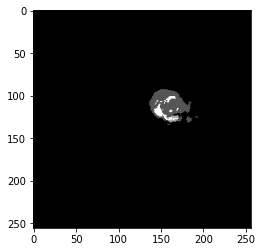

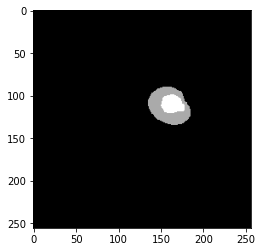

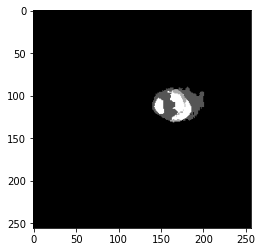

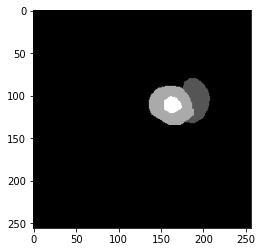

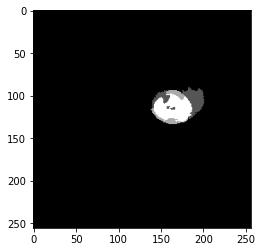

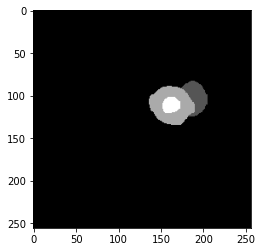

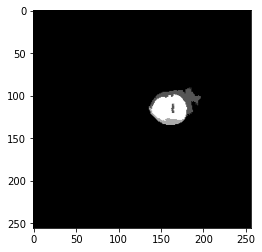

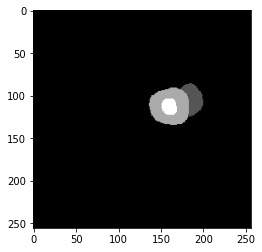

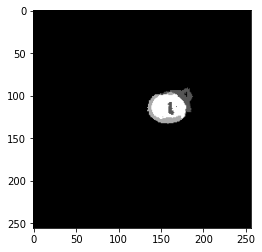

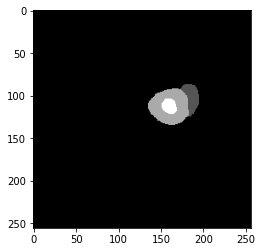

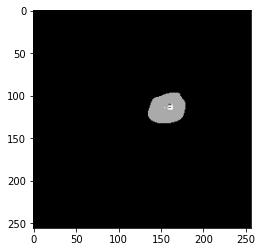

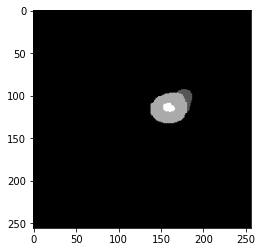

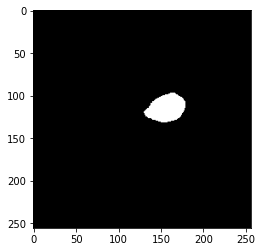

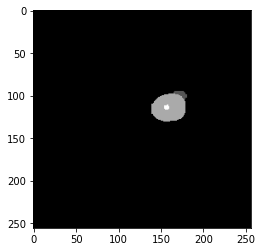

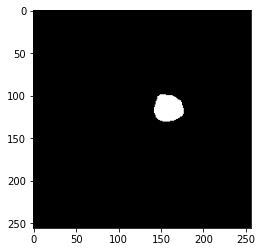

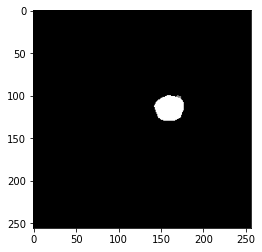

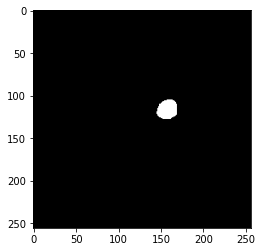

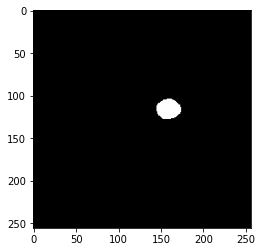

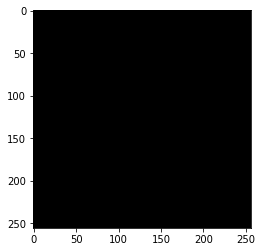

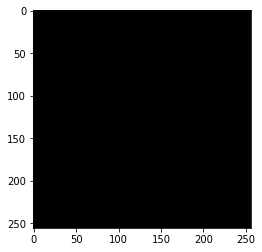

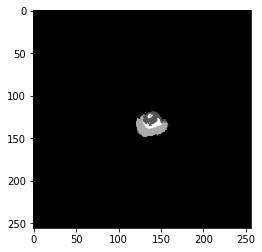

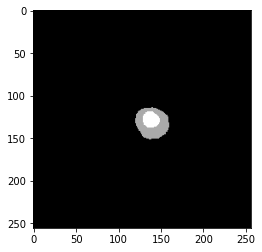

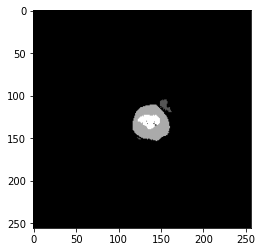

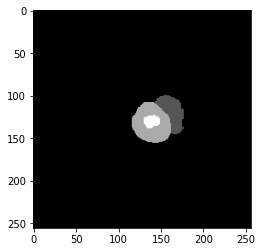

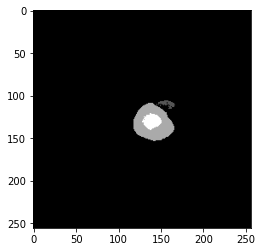

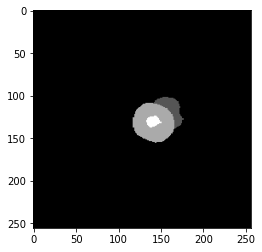

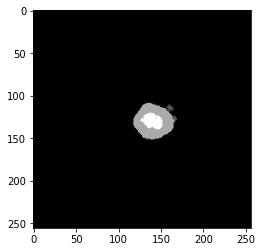

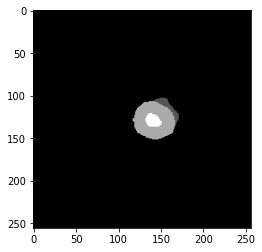

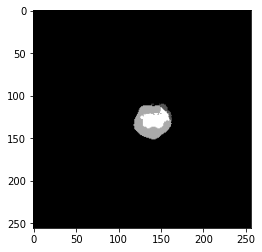

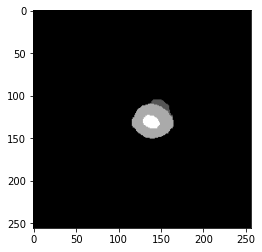

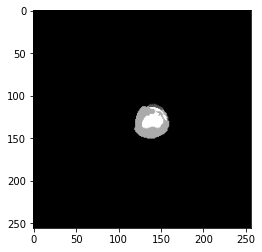

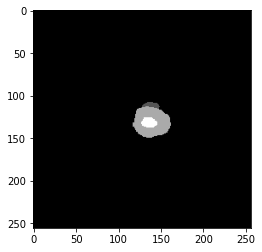

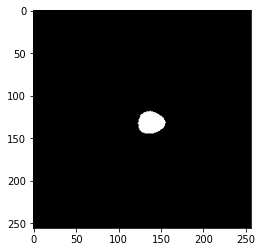

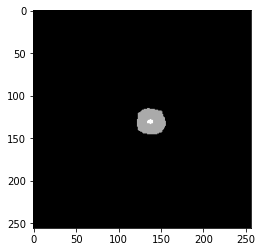

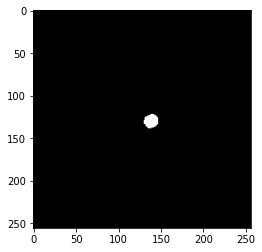

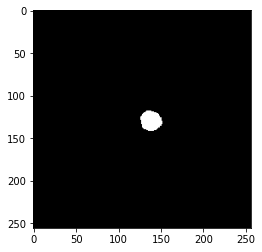

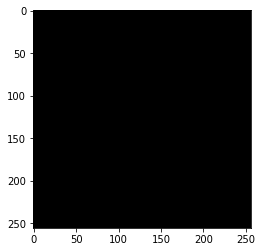

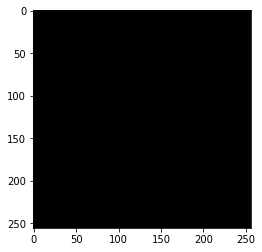

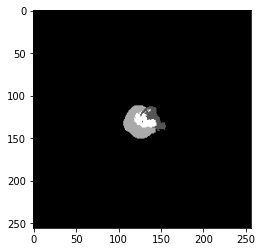

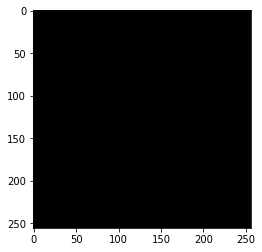

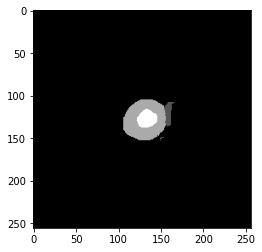

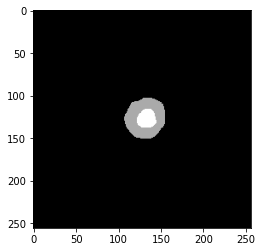

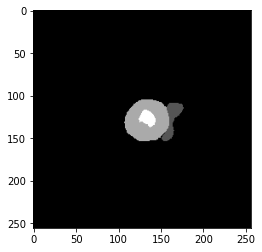

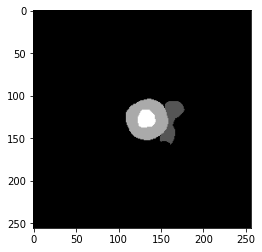

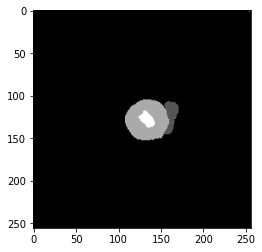

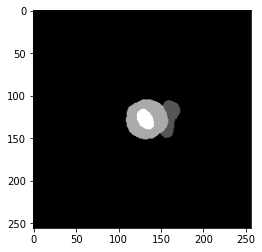

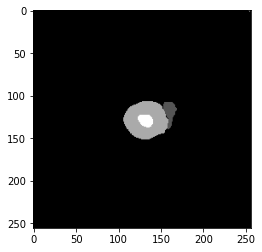

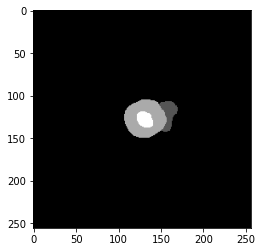

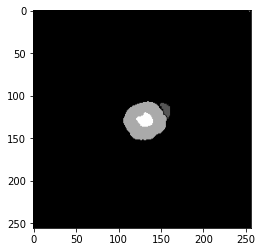

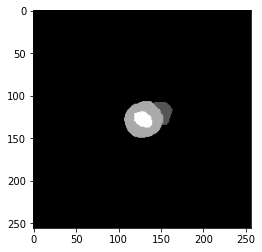

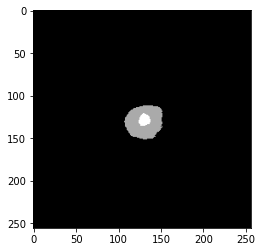

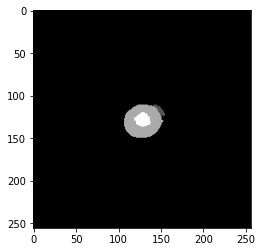

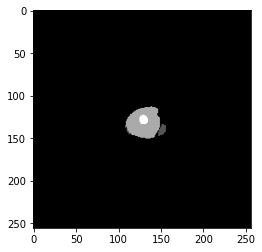

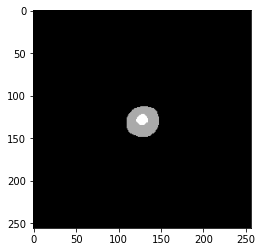

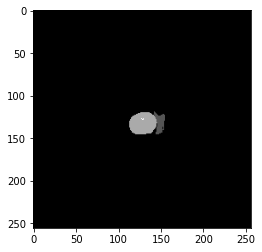

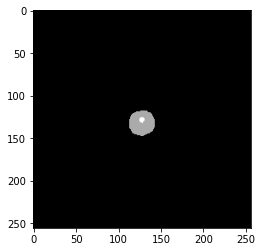

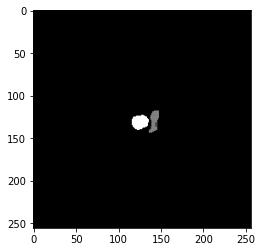

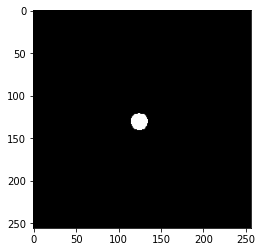

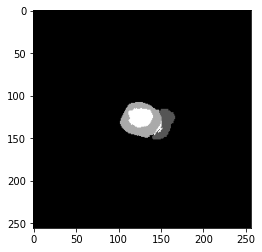

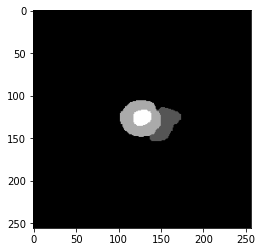

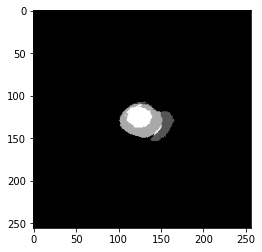

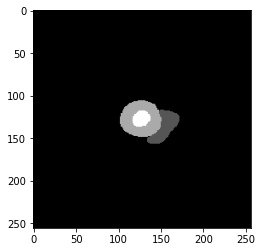

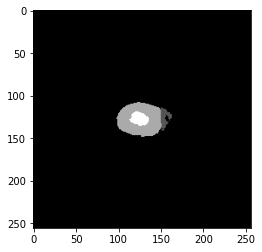

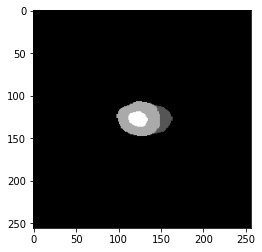

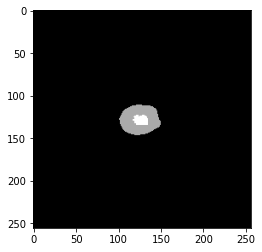

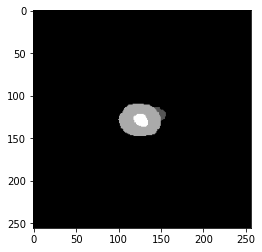

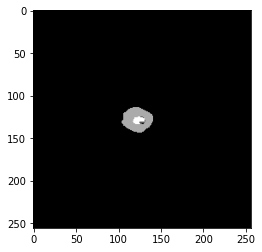

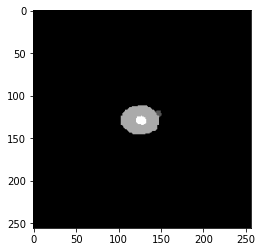

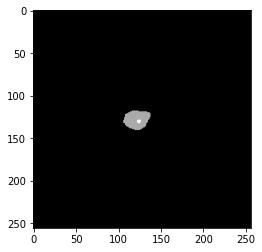

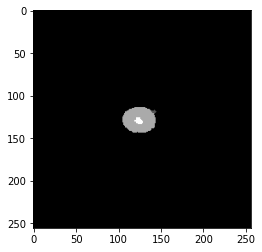

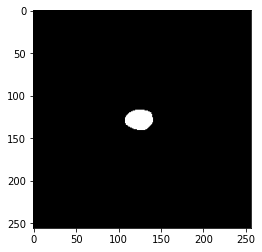

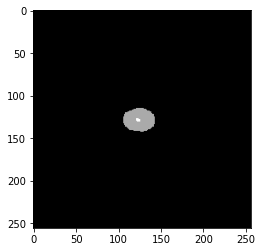

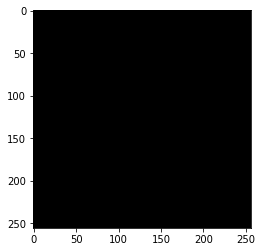

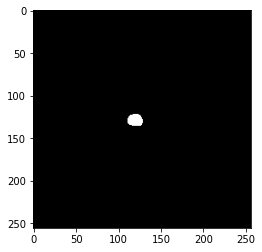

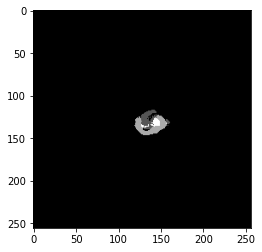

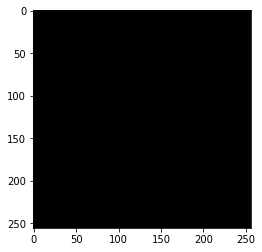

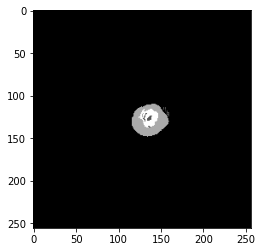

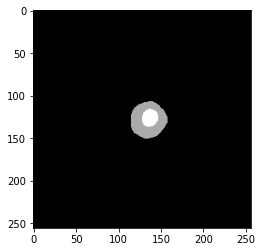

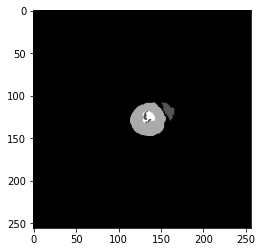

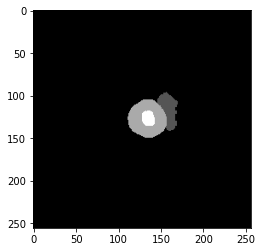

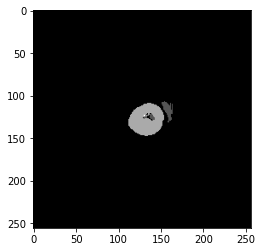

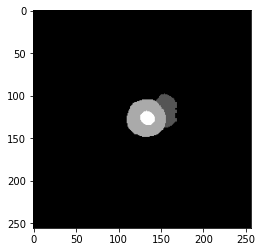

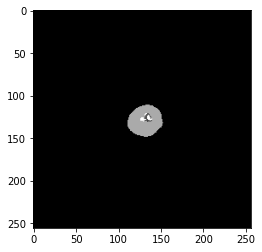

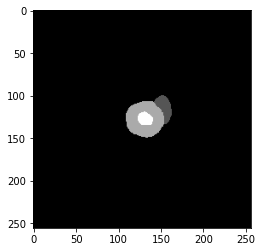

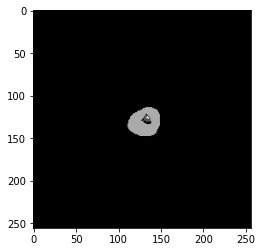

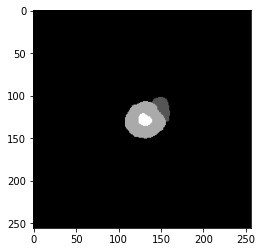

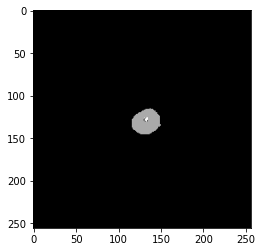

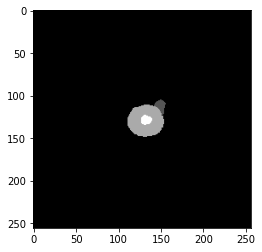

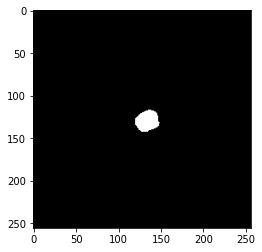

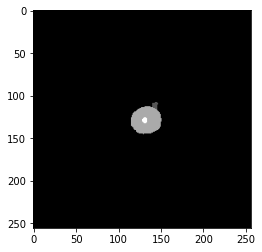

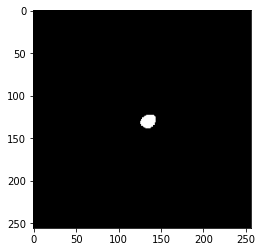

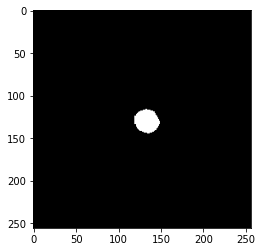

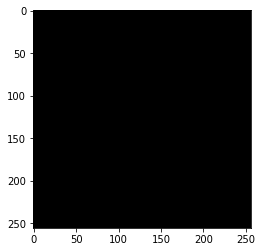

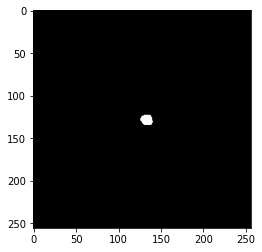

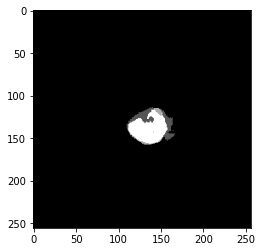

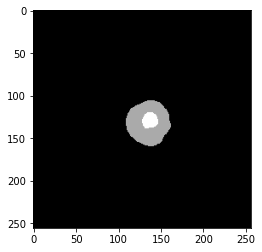

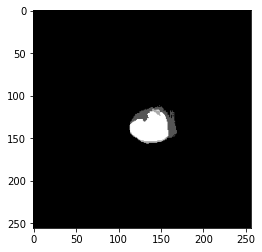

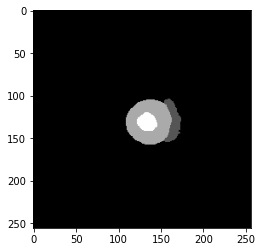

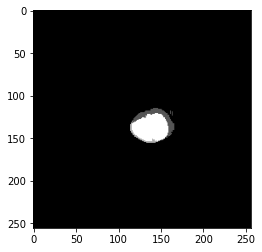

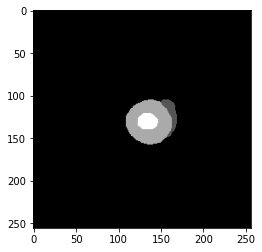

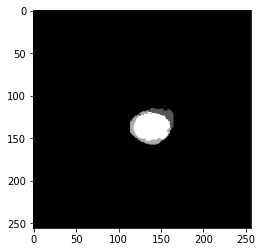

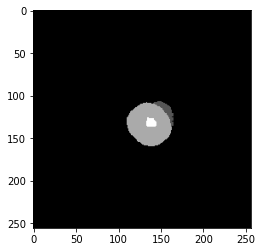

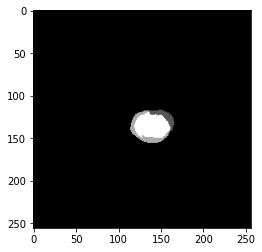

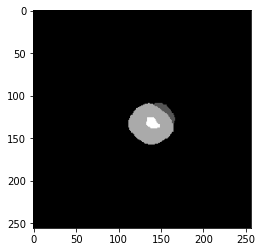

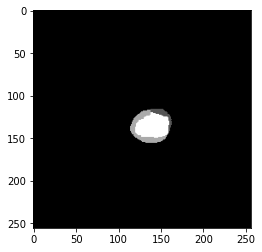

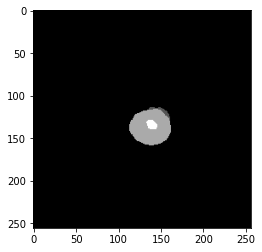

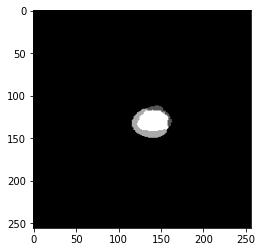

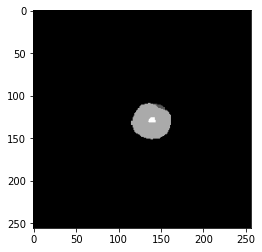

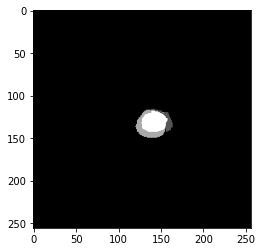

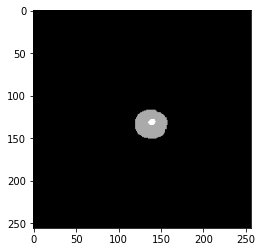

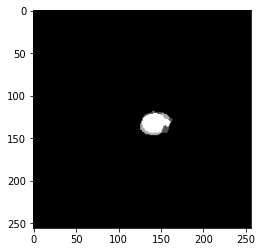

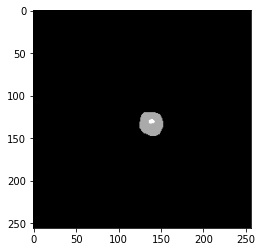

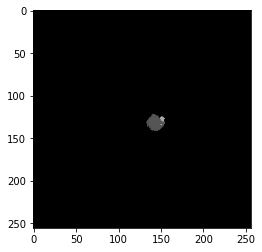

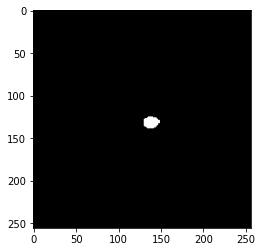

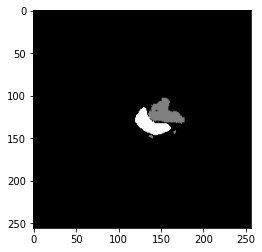

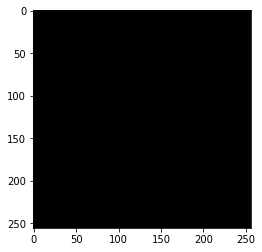

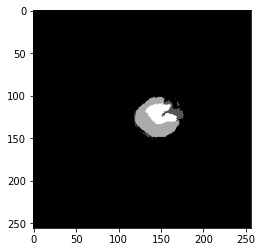

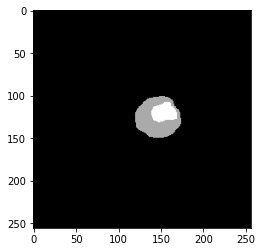

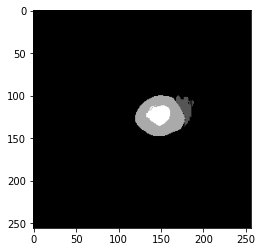

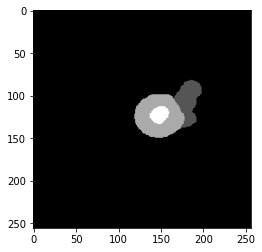

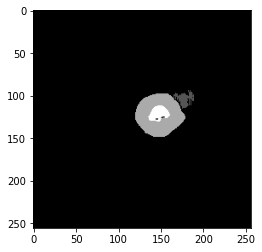

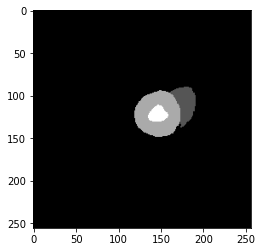

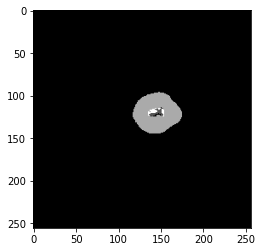

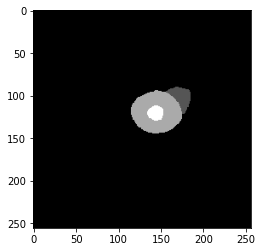

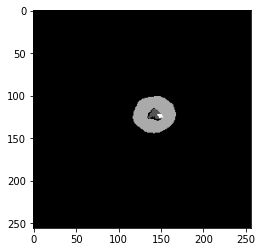

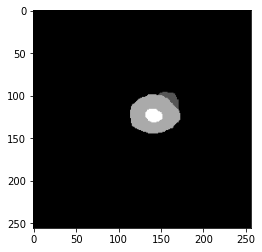

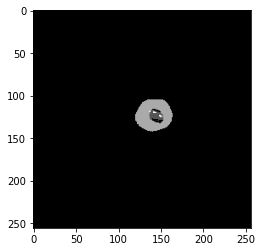

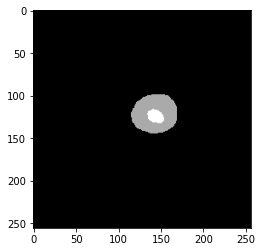

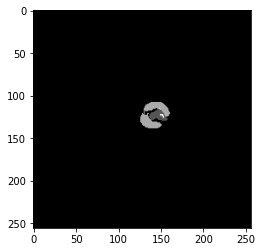

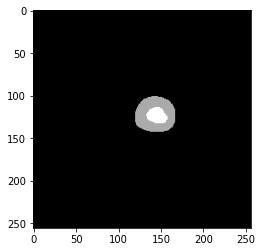

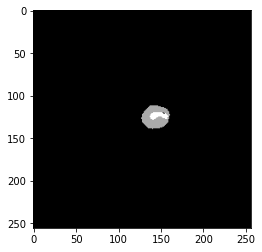

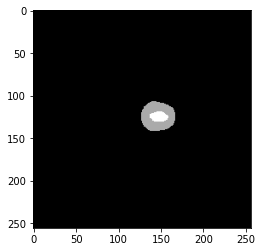

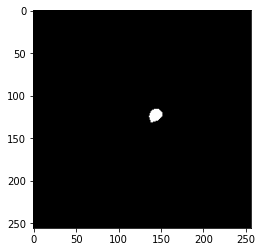

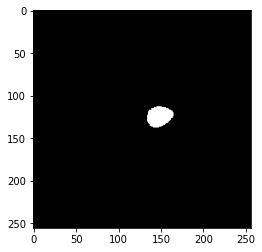

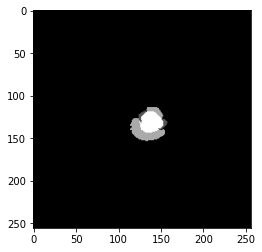

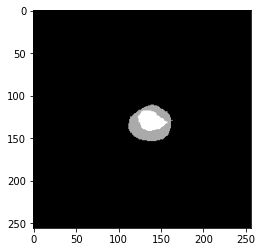

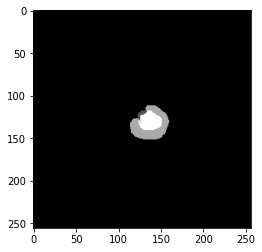

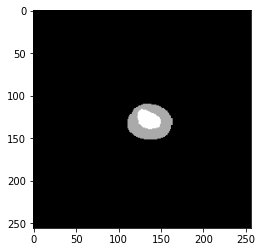

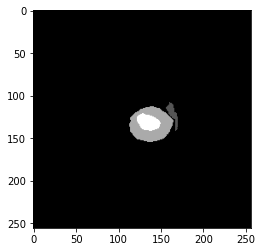

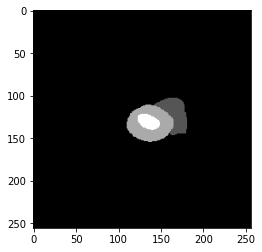

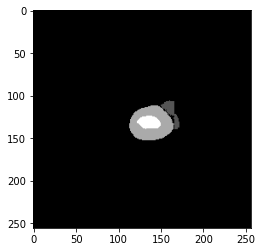

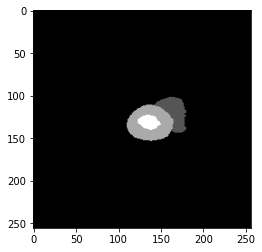

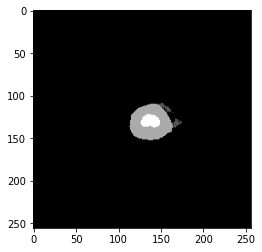

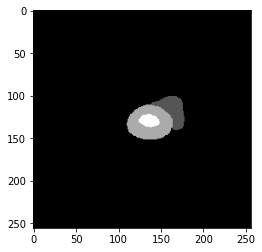

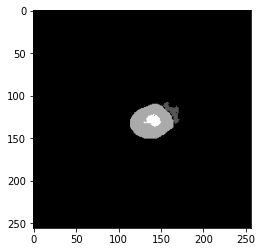

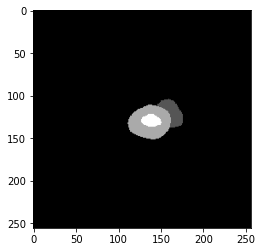

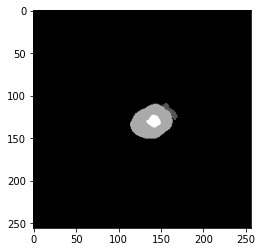

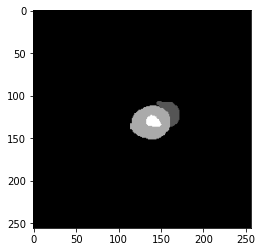

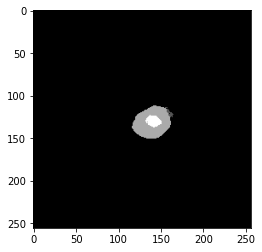

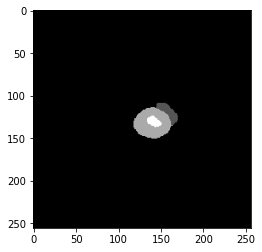

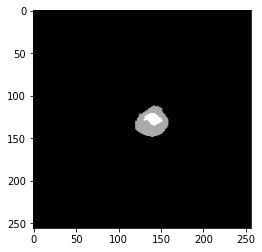

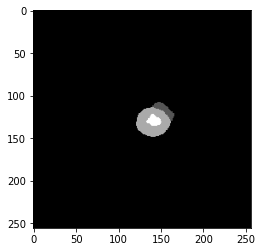

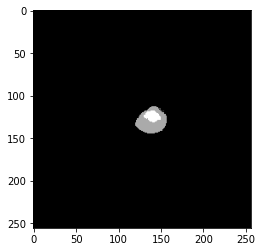

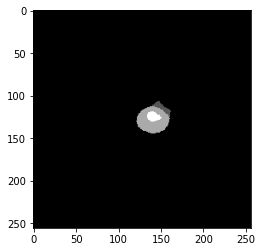

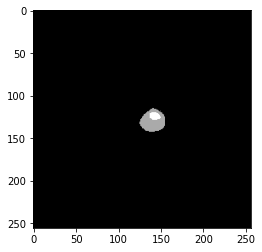

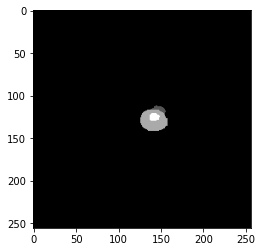

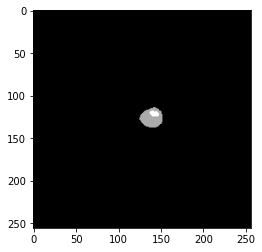

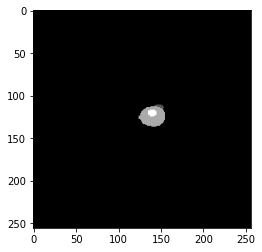

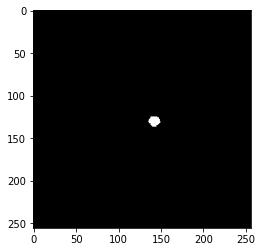

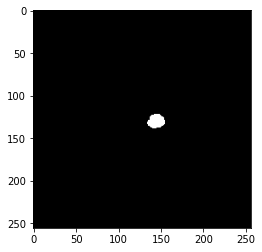

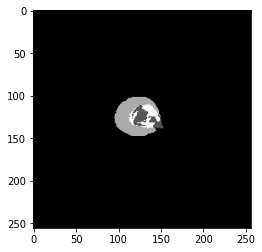

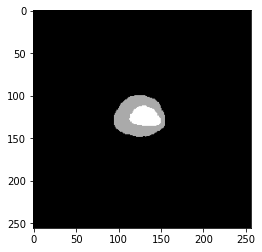

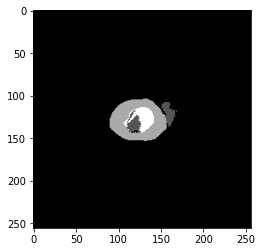

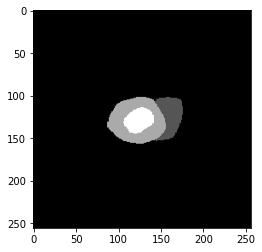

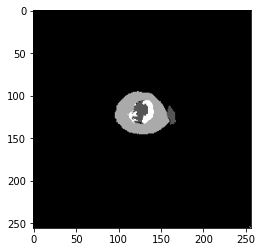

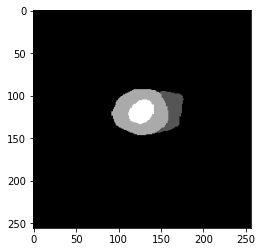

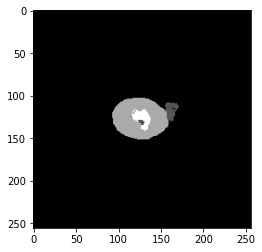

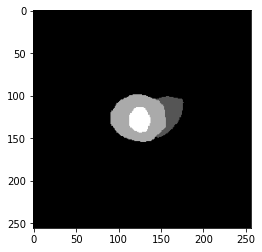

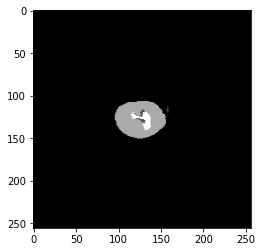

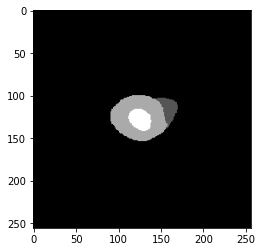

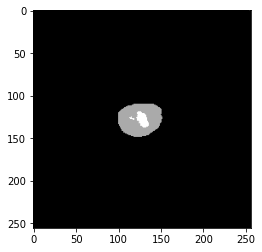

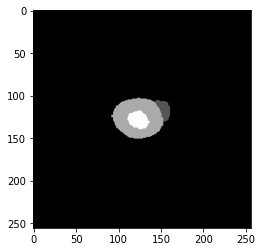

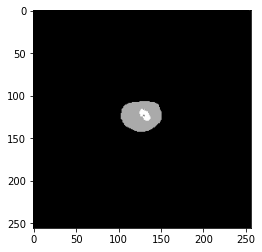

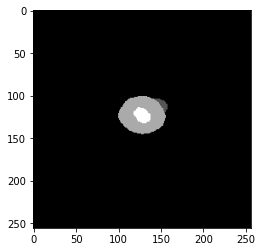

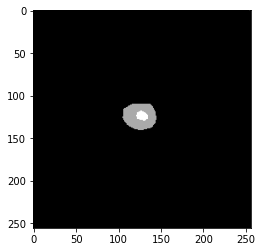

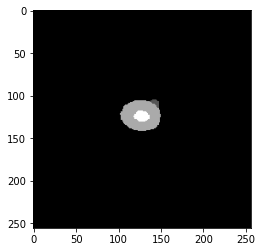

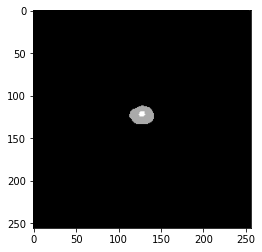

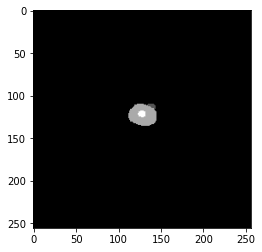

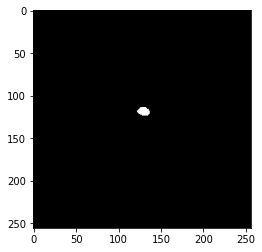

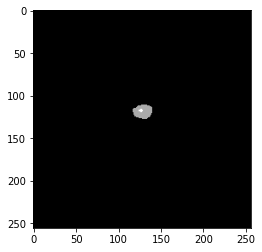

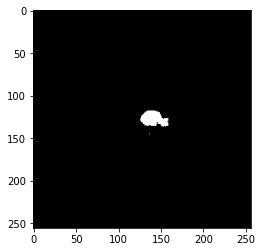

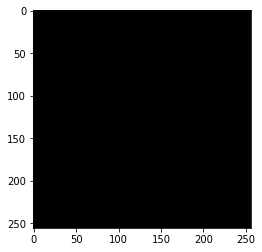

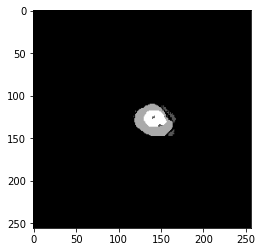

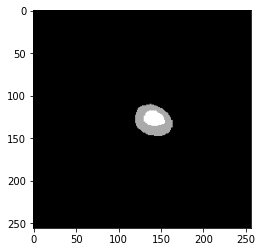

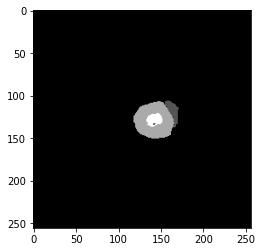

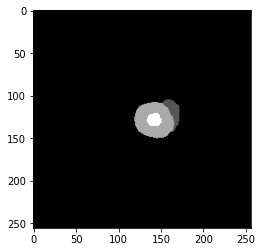

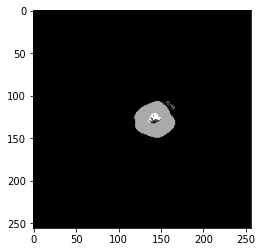

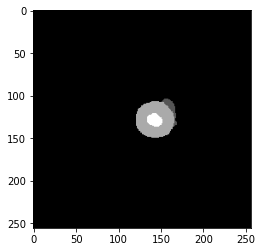

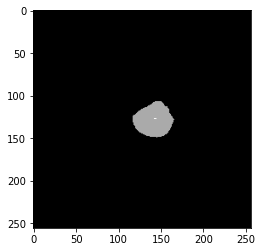

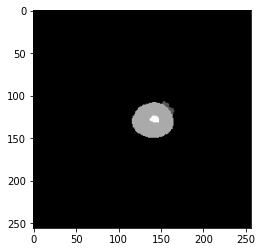

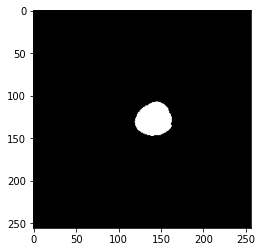

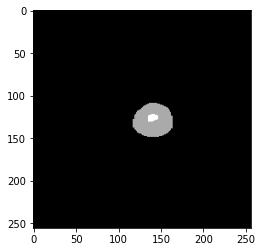

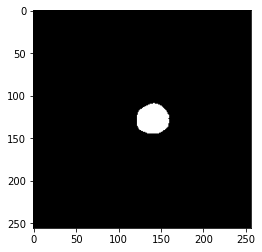

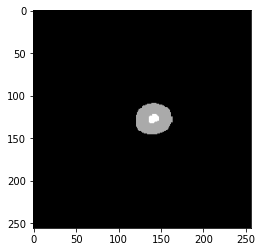

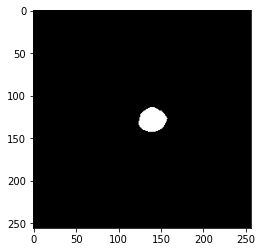

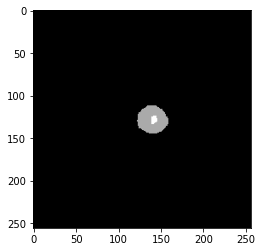

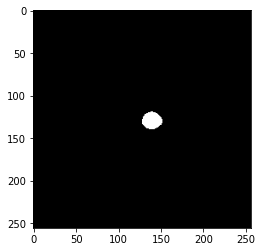

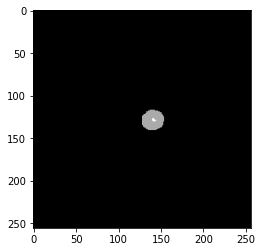

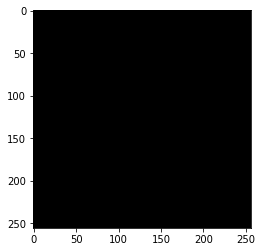

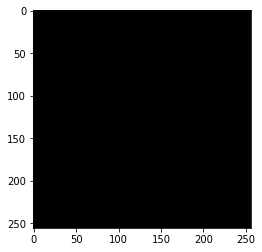

In [0]:
for i in range(10):
    mas = {200}
    train = data_ES_train_HCM[i][0]
    train_v = data_ES_train_HCM[i][1]
    final = ([[[[0]] * train.shape[2]] * 256 ] *256)
    final = np.array(final)
    final.resize((256,256,train.shape[2]))
    flag = 0
    a = [0] * train.shape[2]
    for j in range(train.shape[2]):
        train_slice = train[:,:,j]
        train_slice = train_slice.reshape((256,256,1))
        
        train_slice = np.array([train_slice])



        fin1 = model_ES_HCM.predict(normalize(train_slice))

        
        fin1.reshape((256,256,4))
        fin1.resize((256,256,4))
        
        
        #check(fin1)

        fin1.astype('float64')



        back_orig = hot_back(fin1)


        #a[j] = (pixel_metric(train_r_slice, back_orig))
        fig, ax = plt.subplots()
        ax.imshow(back_orig, cmap='gray')
        fig, ax = plt.subplots()
        ax.imshow(train_v[:,:,j], cmap='gray')
        #print(np.mean(a))
        #fin.resize((256,256))
        #fin = fin.astype('float32') * 1024.
        #final[:,:,j] = fin
    #print("HIIIIIIIIIIIIIIii")
    #fig, ax = plt.subplots()
    #ax.set_title("Final:{}")
    #ax.axis("off")
    #ax.imshow(final[:,:,0], cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


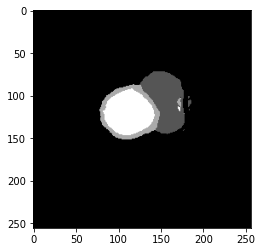

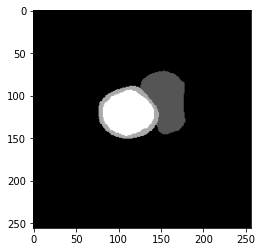

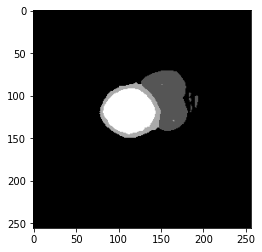

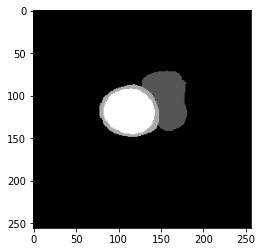

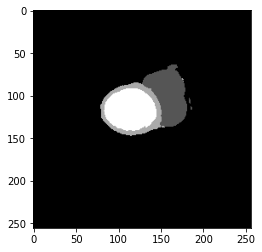

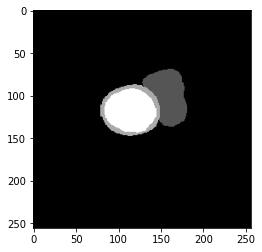

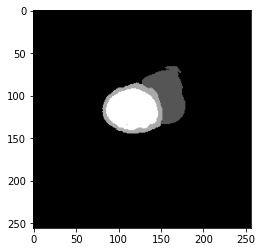

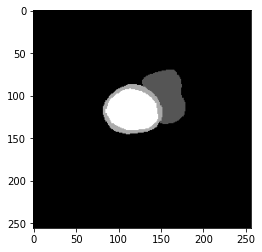

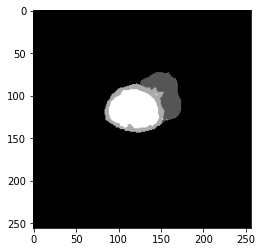

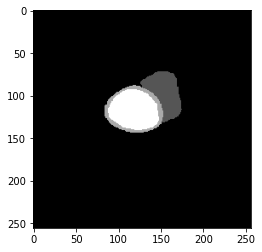

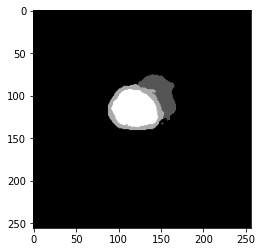

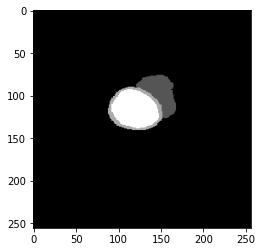

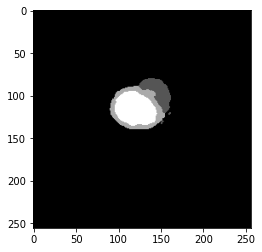

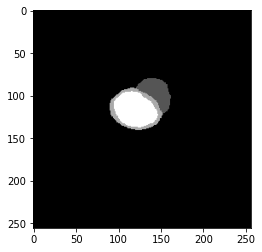

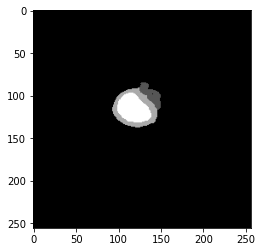

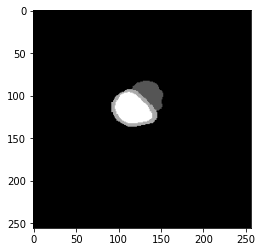

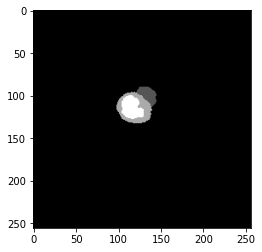

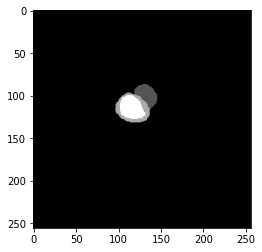

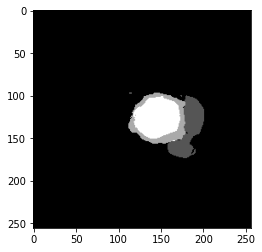

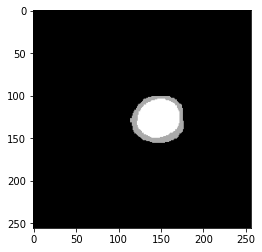

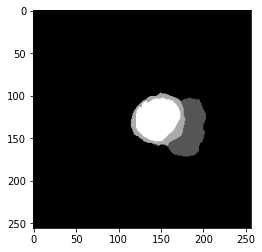

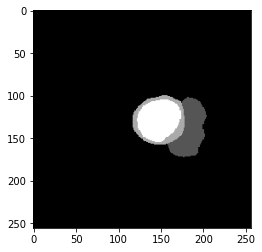

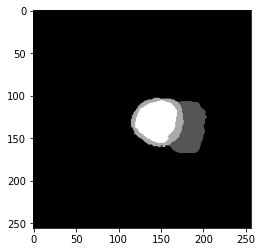

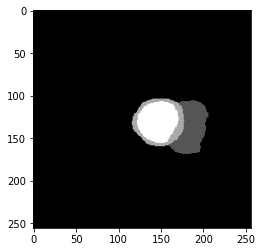

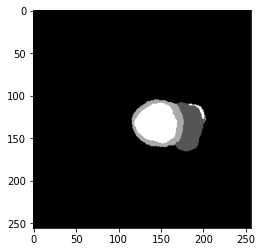

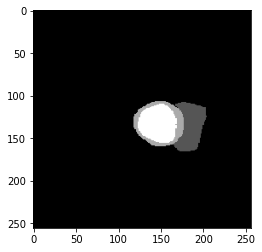

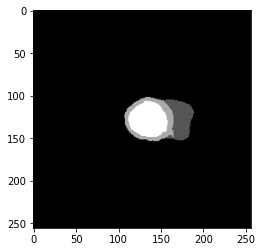

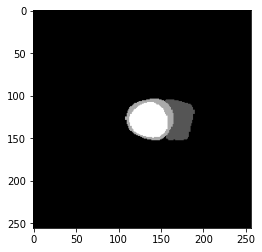

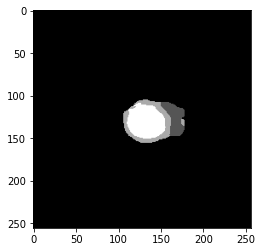

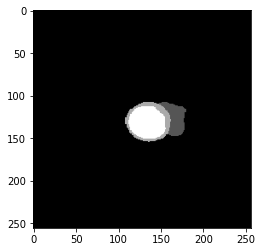

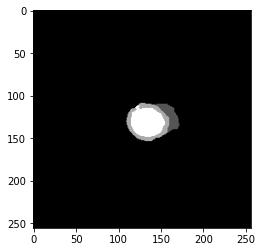

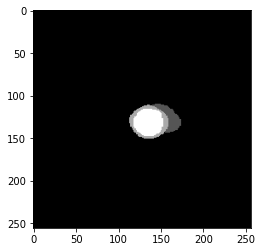

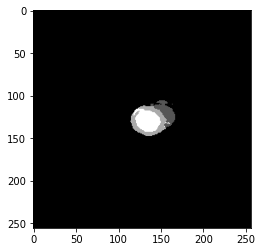

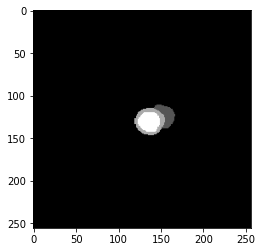

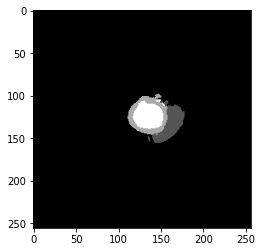

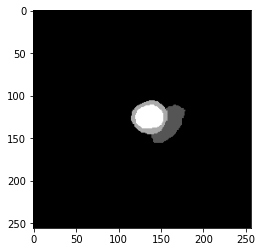

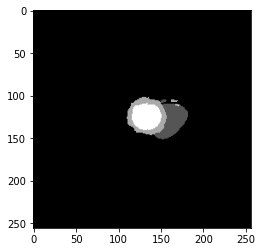

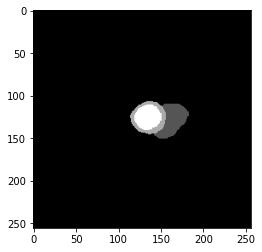

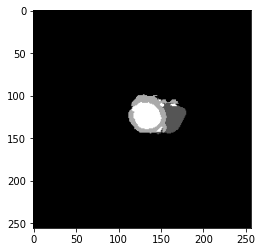

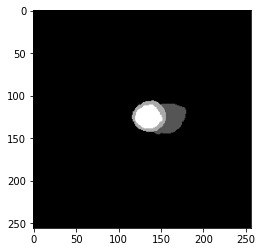

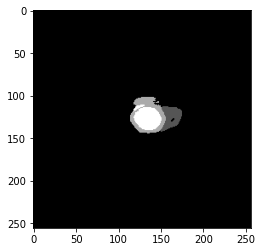

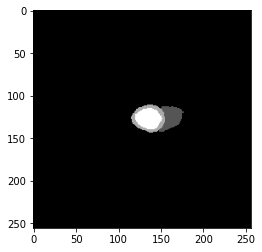

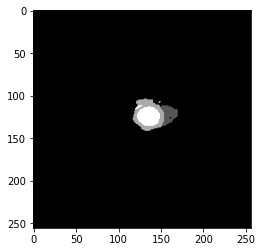

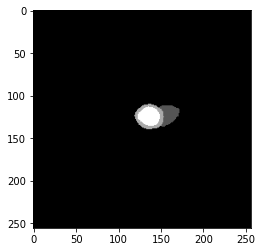

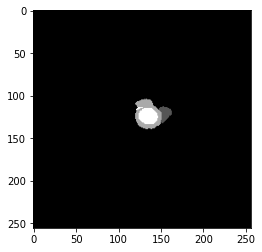

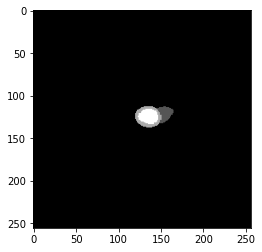

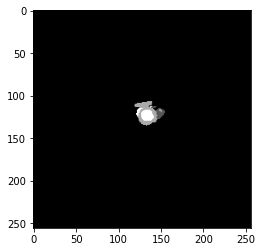

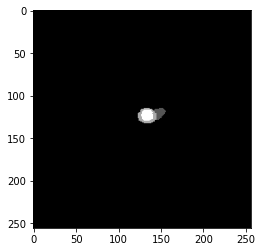

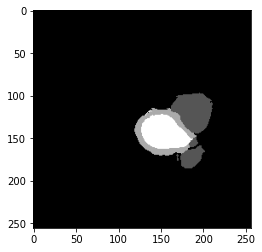

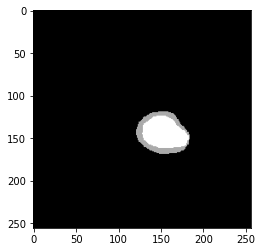

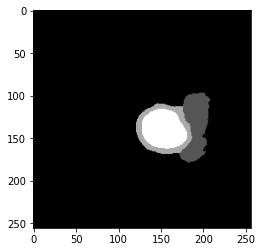

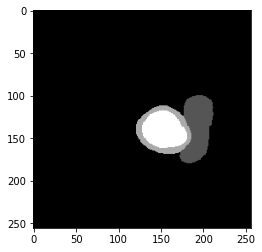

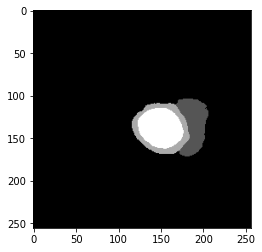

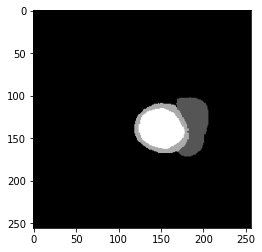

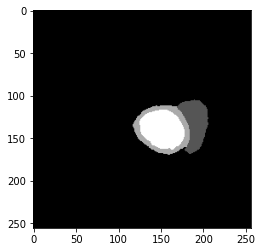

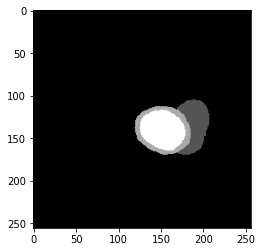

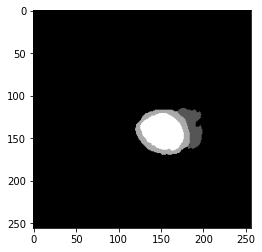

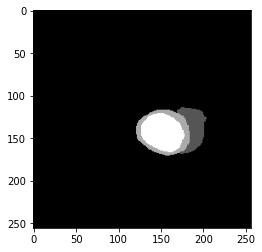

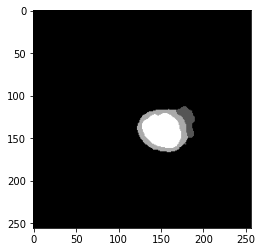

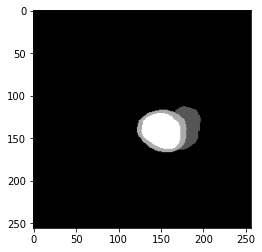

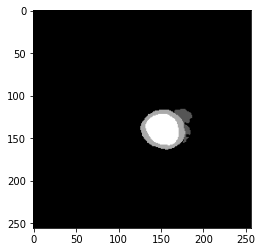

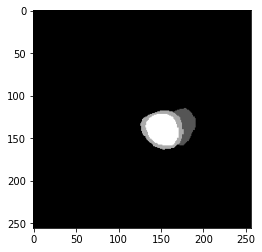

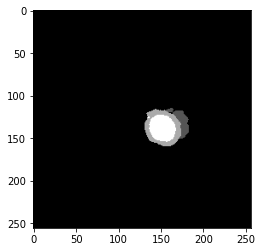

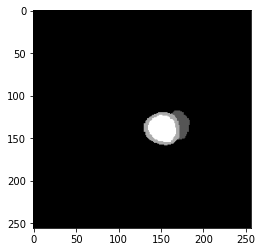

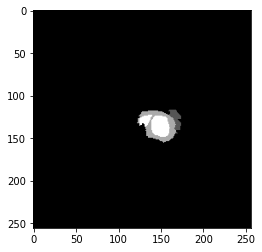

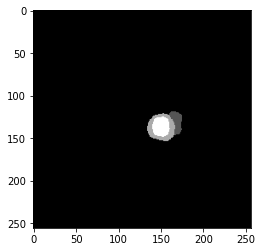

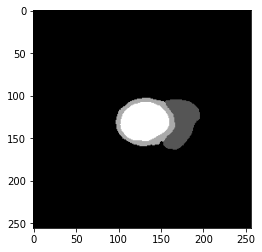

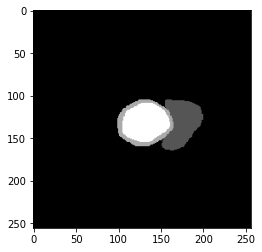

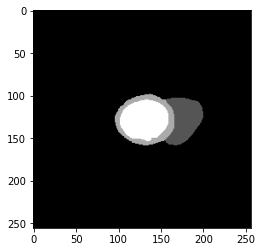

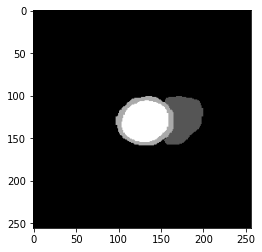

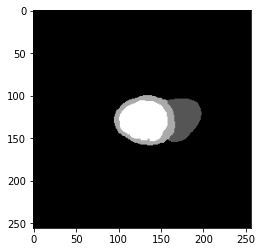

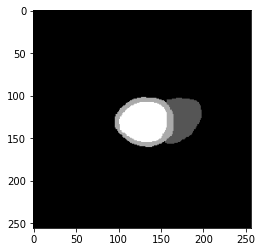

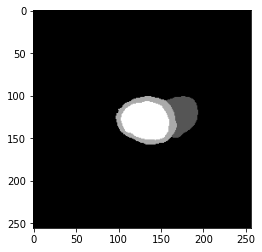

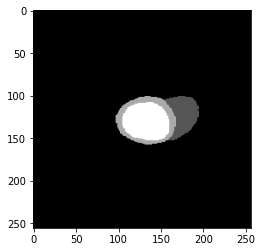

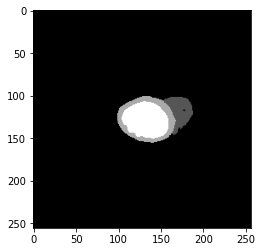

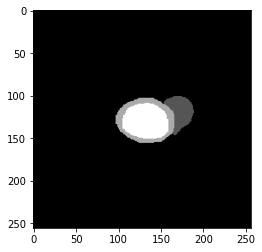

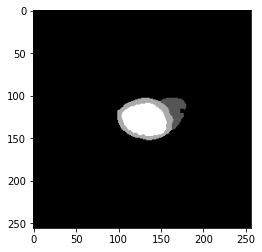

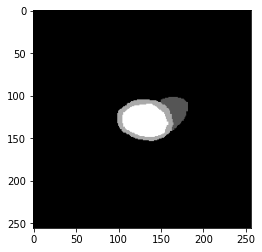

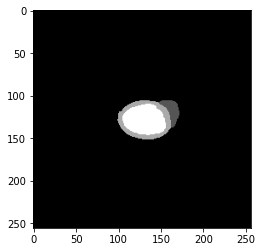

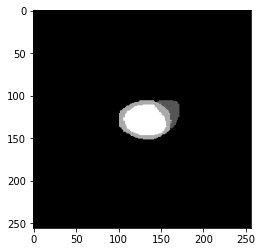

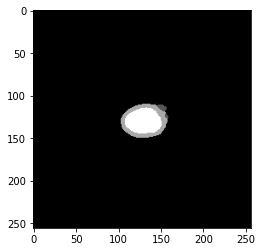

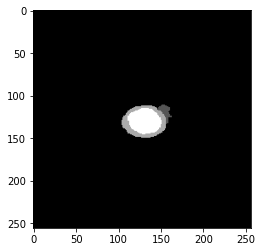

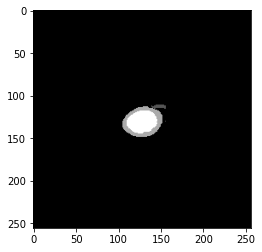

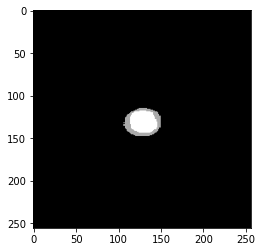

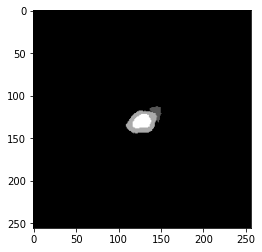

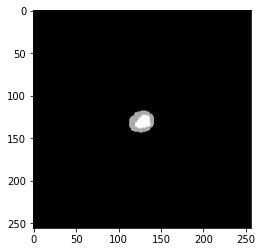

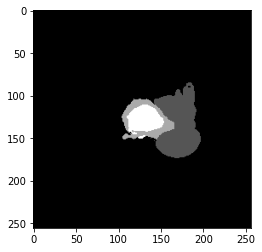

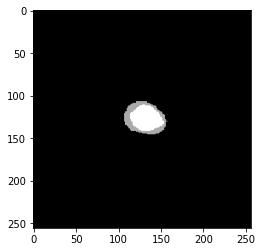

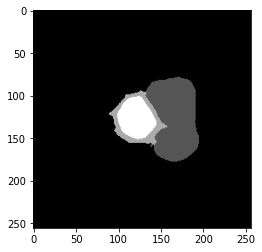

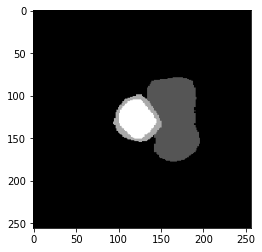

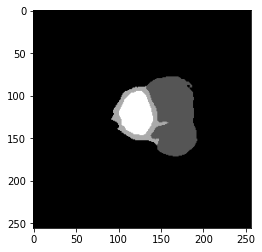

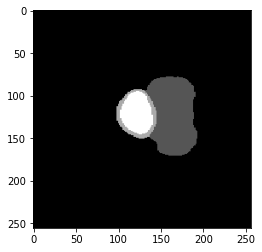

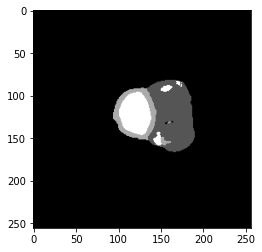

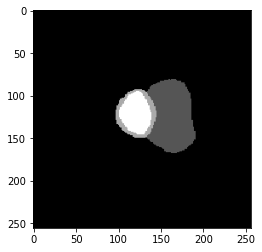

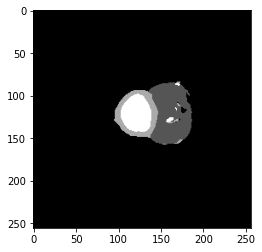

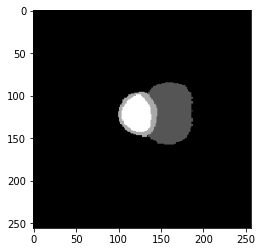

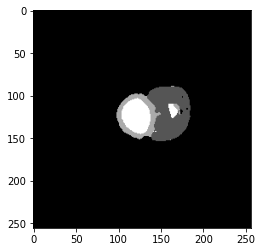

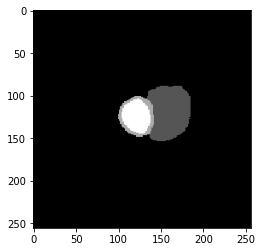

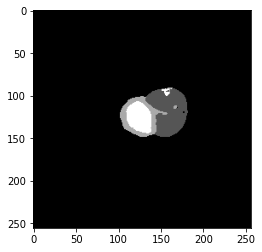

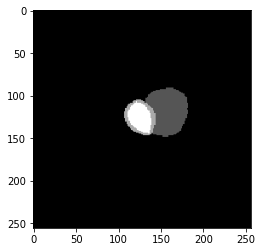

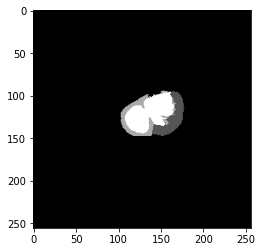

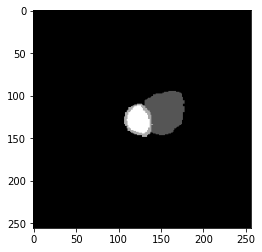

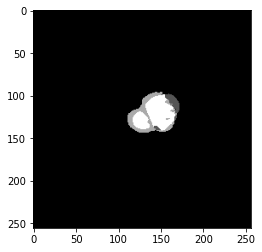

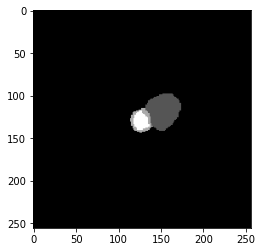

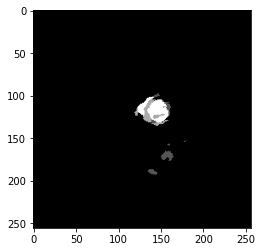

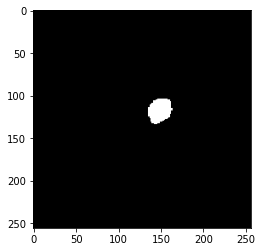

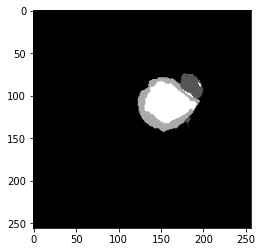

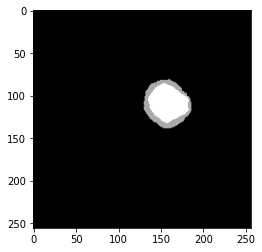

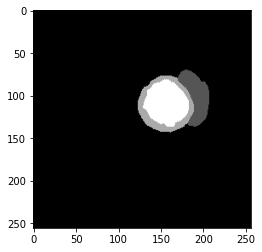

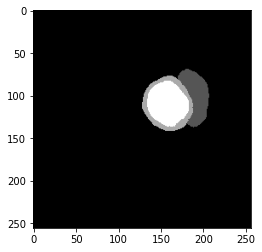

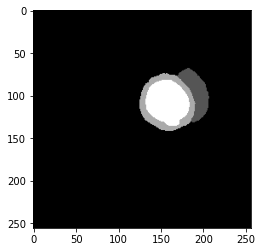

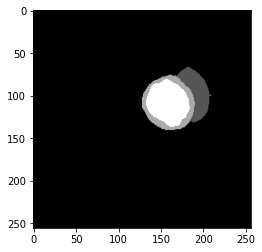

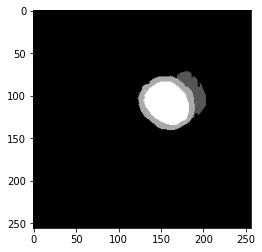

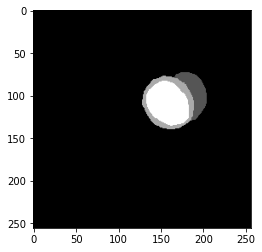

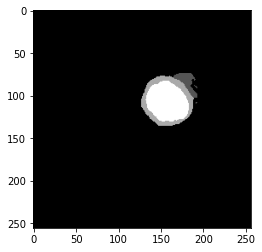

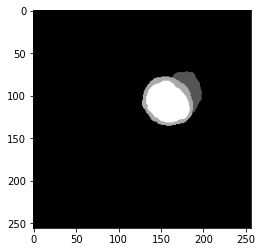

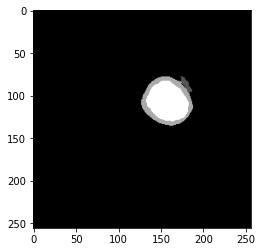

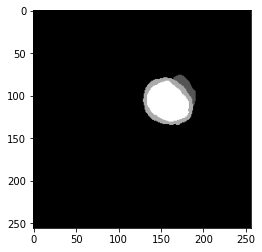

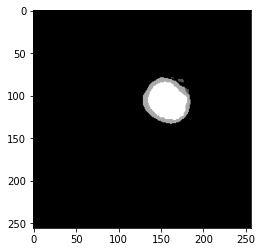

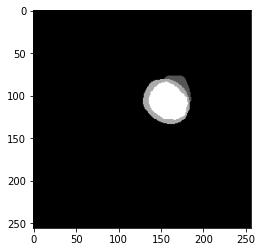

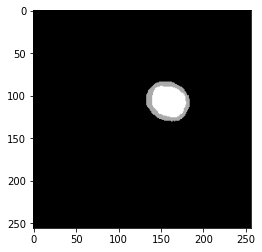

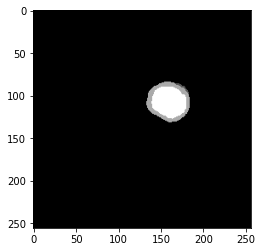

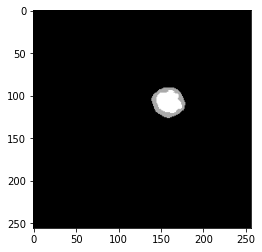

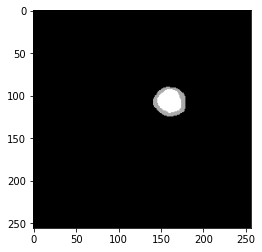

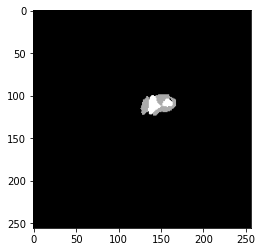

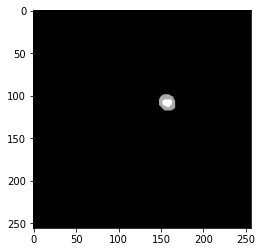

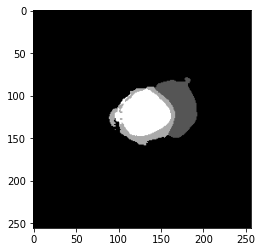

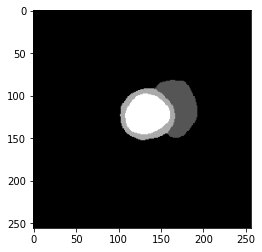

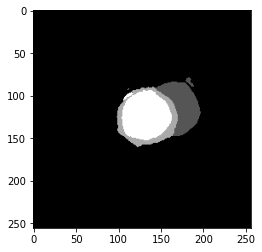

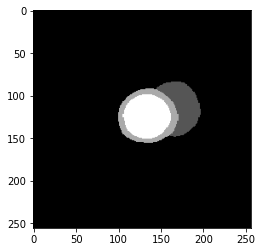

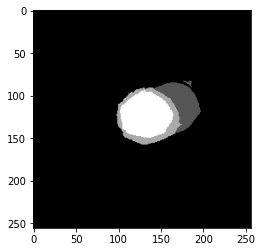

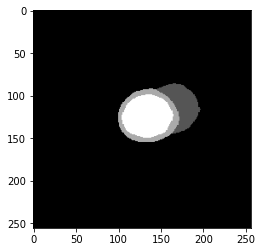

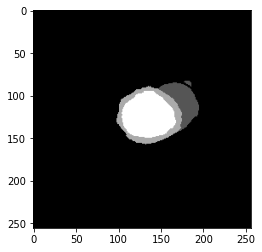

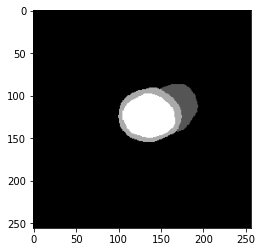

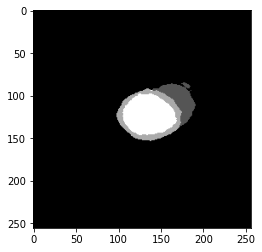

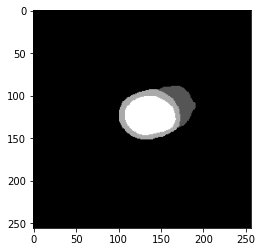

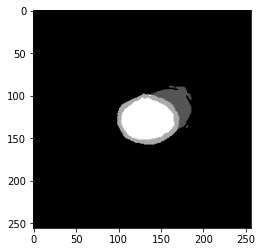

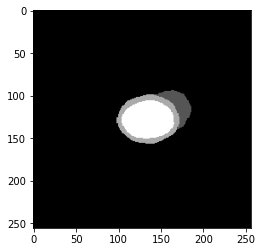

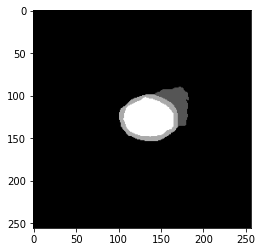

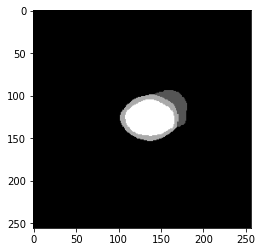

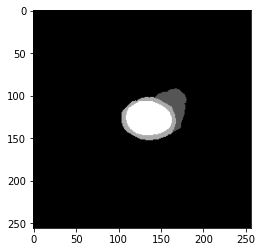

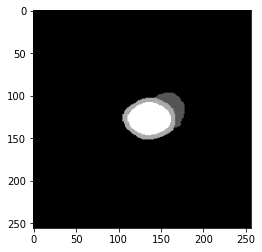

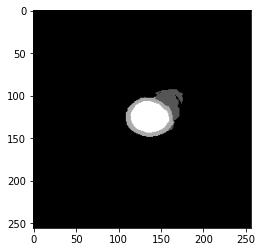

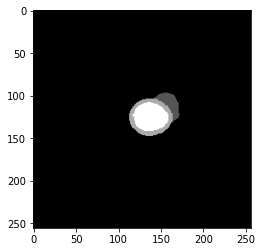

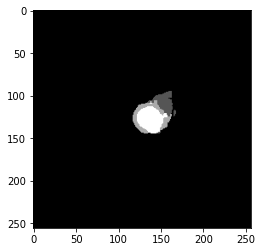

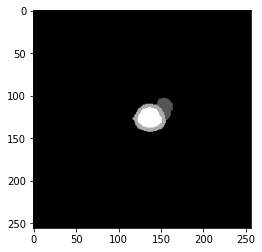

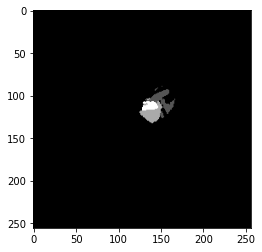

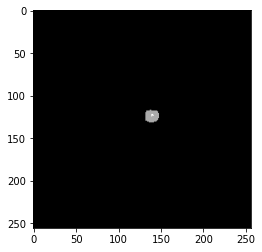

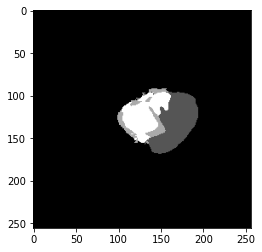

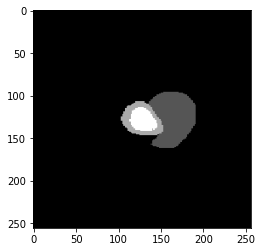

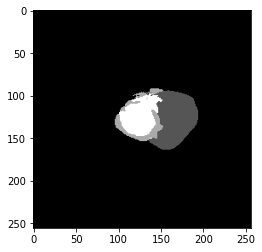

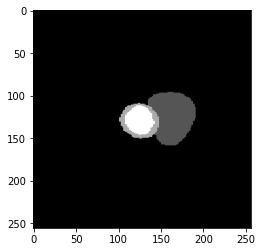

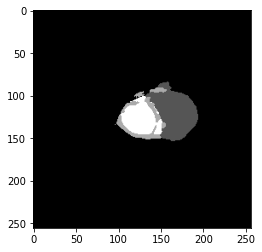

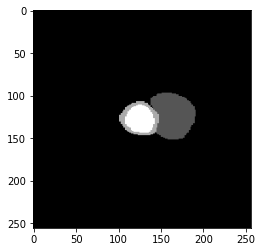

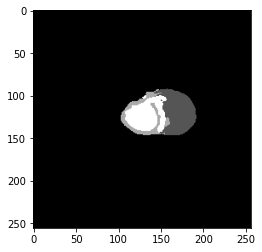

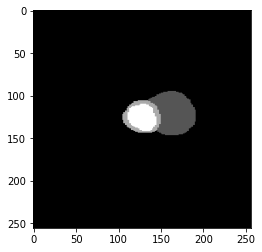

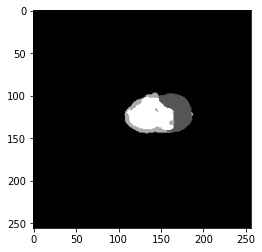

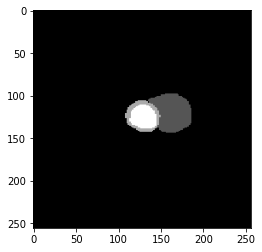

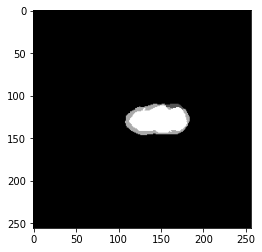

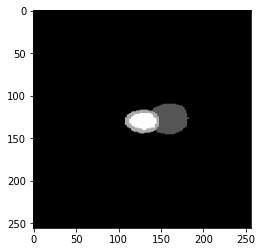

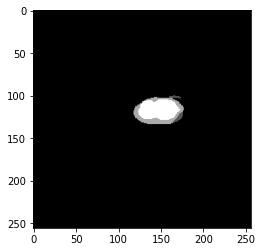

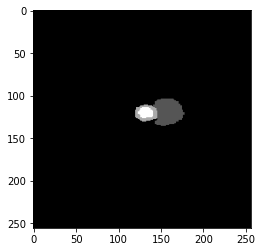

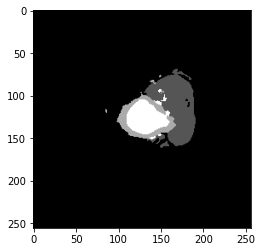

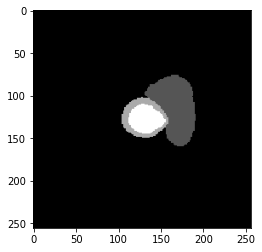

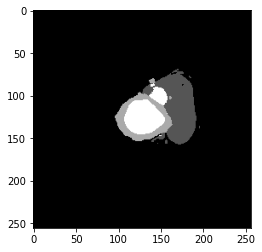

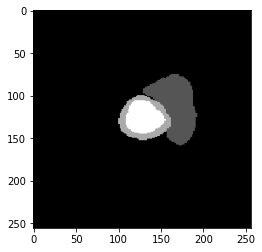

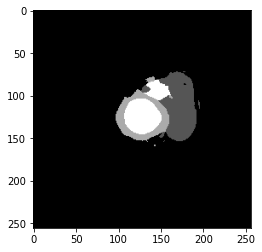

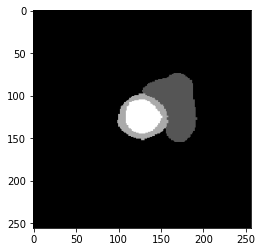

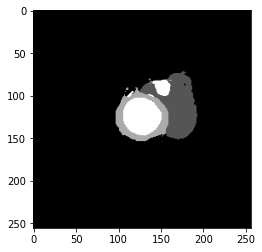

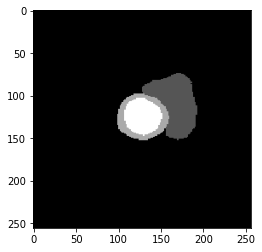

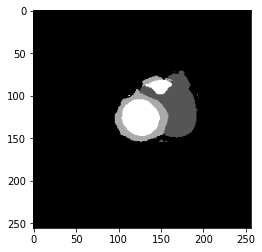

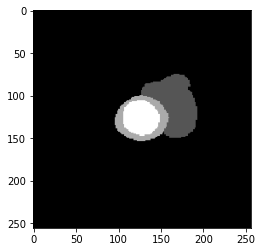

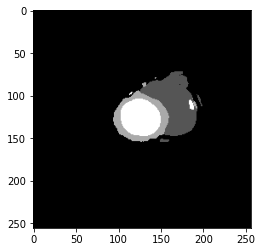

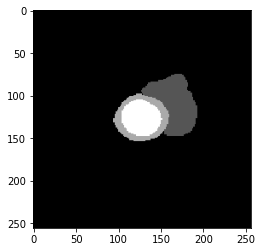

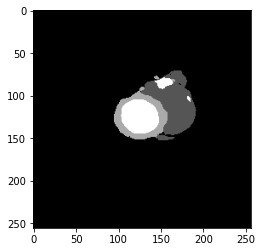

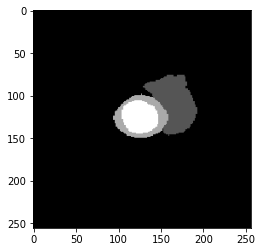

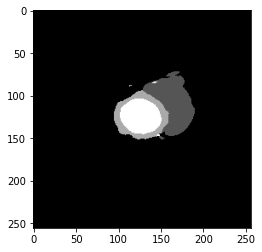

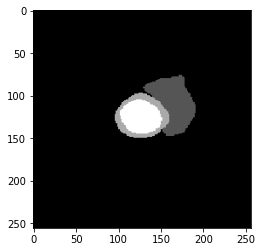

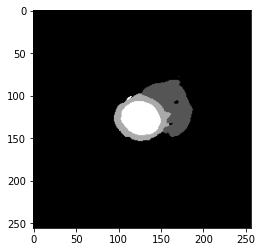

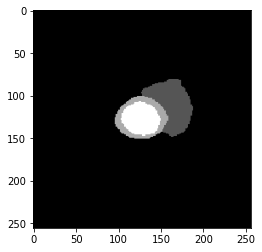

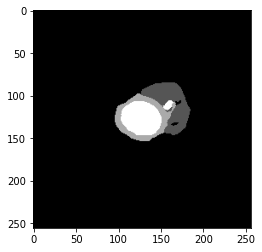

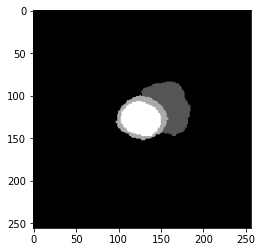

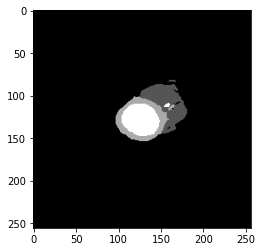

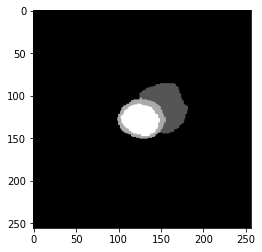

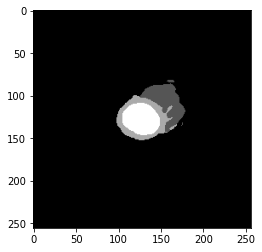

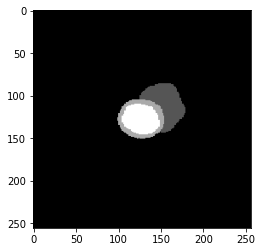

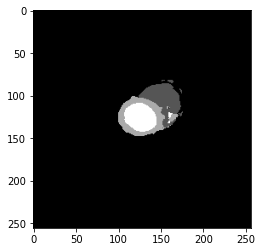

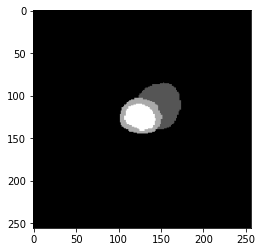

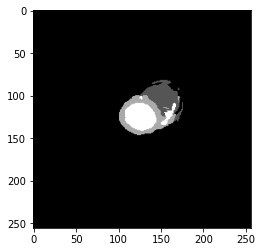

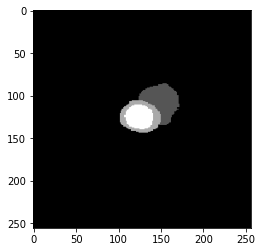

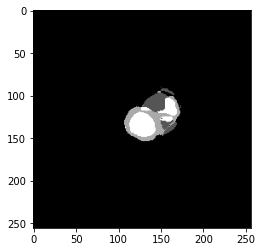

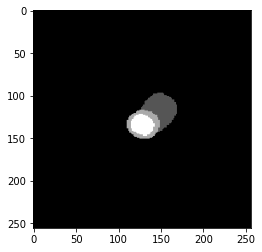

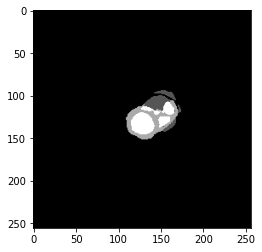

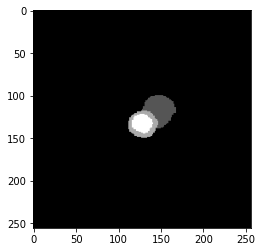

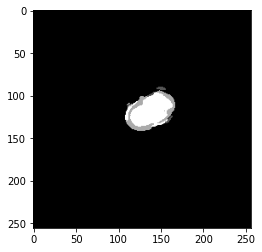

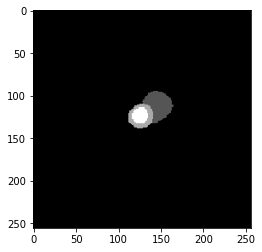

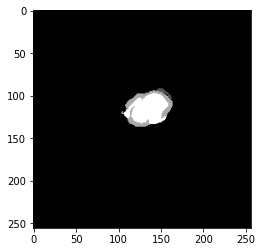

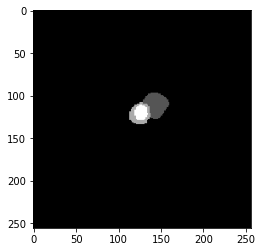

In [0]:
for i in range(10):
    mas = {200}
    train = data_ED_train[i][0]
    train_v = data_ED_train[i][1]
    final = ([[[[0]] * train.shape[2]] * 256 ] *256)
    final = np.array(final)
    final.resize((256,256,train.shape[2]))
    flag = 0
    a = [0] * train.shape[2]
    for j in range(train.shape[2]):
        train_slice = train[:,:,j]
        train_slice = train_slice.reshape((256,256,1))
        
        train_slice = np.array([train_slice])



        fin1 = model_ED.predict(normalize(train_slice))

        
        fin1.reshape((256,256,4))
        fin1.resize((256,256,4))
        
        
        #check(fin1)

        fin1.astype('float64')



        back_orig = hot_back(fin1)


        #a[j] = (pixel_metric(train_r_slice, back_orig))
        fig, ax = plt.subplots()
        ax.imshow(back_orig, cmap='gray')
        fig, ax = plt.subplots()
        ax.imshow(train_v[:,:,j], cmap='gray')
        #print(np.mean(a))
        #fin.resize((256,256))
        #fin = fin.astype('float32') * 1024.
        #final[:,:,j] = fin
    #print("HIIIIIIIIIIIIIIii")
    #fig, ax = plt.subplots()
    #ax.set_title("Final:{}")
    #ax.axis("off")
    #ax.imshow(final[:,:,0], cmap='gray')

In [0]:
#64;6

def get_pic(num, flag):
    if(flag == 'ES'):
        train = data_ES_test[num][0]
    else:
        train = data_ED_test[num][0]
    #print(train.shape[2])
    final = ([[[[0]] * train.shape[2]] * 256 ] *256)
    final = np.array(final)
    final.resize((256,256,train.shape[2]))
    flag = 0
    a = [0] * train.shape[2]
    
    for j in range(train.shape[2]):
        train_slice = train[:,:,j]

        #train_slice = gt_to_one_hot(train_slice)
        
        train_slice = np.array([train_slice])
        if(flag == 'ED'):
            fin1 = model_ED.predict(normalize(train_slice))
        else:
          fin1 = model_ES.predict(normalize(train_slice))
        """
        if(data_ES_test[num][3] == 'RV'):
            fin1 = new_model_RV.predict(train_slice)
        if(data_ES_test[num][3] == 'HCM'):
            fin1 = new_model_HCM.predict(train_slice)
              
        if(data_ES_test[num][3] == 'DCM'):
            fin1 = new_model_DCM.predict(train_slice)
        if(data_ES_test[num][3] == 'NOR'):
            fin1 = new_model_NOR.predict(train_slice)
        if(data_ES_test[num][3] == 'MINF'):
            fin1 = new_model_MINF.predict(train_slice)
        """
        fin1.reshape((256,256,4))
        fin1.resize((256,256,4))
        


        #check(fin1)

        fin1.astype('float64')
        back_orig = hot_back(fin1)
        final[:,:,j] = back_orig
        
    return final


In [0]:
def dump_dataset( cycle_type='ES', is_train = True,dataset_directory = 'Test'):
    '''
    Загрузка датасета в RAM.
    Возвращает список из кортежей вида (3D МРТ-изображение, Разметка, Имя пациента)
    В случае загрузки данных из тестовой выборки (is_train == False), 
    поле разметки в кортеже имеет значение None
    '''
    #assert cycle_type == 'ES' or cycle_type == 'ED'
    i = 0
    sum = 0
    for patient_name in os.listdir(dataset_directory):
        #num = patient_name[8:]
        #num = int(num)
        patient_path = os.path.join(dataset_directory,patient_name)
        info_file_path = os.path.join(patient_path, 'Info.cfg')
        #print(num)
        patient_info = read_info_file(info_file_path)
        frame_number_ES = patient_info['ES']
        frame_number_ED = patient_info['ED']
        """
        #print(len(frame_number_ES.type))
        
        image_name_ES = '{}_frame{}.nii'.format(patient_name, frame_number_ES.zfill(2))
        image_name_ED = '{}_frame{}.nii'.format(patient_name, frame_number_ED.zfill(2))
        

        image_data_ES = nib.load(os.path.join(patient_path, image_name_ES)).get_fdata()
        image_data_ED = nib.load(os.path.join(patient_path, image_name_ES)).get_fdata()
        
        print(image_data_ES.shape)
        print(image_data_ED.shape)
        """
        img_ES = get_pic(i,'ES')
        img_ED = get_pic(i,'ED')
        sum = img_ES.shape[2]
        #print(sum)
        #img_ES = data_ES_train[i][1]
        #img_ED = data_ED_train[i][1]
        
        gt_name_ES = '{}_frame{}_gt.nii'.format(patient_name, frame_number_ES.zfill(2))
        gt_name_ED = '{}_frame{}_gt.nii'.format(patient_name, frame_number_ED.zfill(2))
        #print(gt_name_ES, gt_name_ED)
        print(gt_name_ES, gt_name_ED)
        #os.remove(os.path.join(patient_path, gt_name_ES))
        #os.remove(os.path.join(patient_path, gt_name_ED))
        
        img_ES = nib.Nifti1Image(img_ES, np.eye(4))
        img_ED = nib.Nifti1Image(img_ED, np.eye(4))
        
        
        nib.save(img_ES, os.path.join(patient_path, gt_name_ES))
        nib.save(img_ED, os.path.join(patient_path, gt_name_ED))
        i += 1


In [0]:
dump_dataset()

patient025_frame12_gt.nii patient025_frame01_gt.nii
patient029_frame07_gt.nii patient029_frame01_gt.nii
patient026_frame11_gt.nii patient026_frame01_gt.nii
patient030_frame10_gt.nii patient030_frame01_gt.nii
patient028_frame13_gt.nii patient028_frame01_gt.nii
patient027_frame07_gt.nii patient027_frame01_gt.nii
patient024_frame15_gt.nii patient024_frame01_gt.nii
patient023_frame10_gt.nii patient023_frame01_gt.nii
patient021_frame14_gt.nii patient021_frame01_gt.nii
patient017_frame12_gt.nii patient017_frame01_gt.nii
patient015_frame09_gt.nii patient015_frame01_gt.nii
patient020_frame12_gt.nii patient020_frame01_gt.nii
patient016_frame12_gt.nii patient016_frame01_gt.nii
patient018_frame10_gt.nii patient018_frame01_gt.nii
patient019_frame11_gt.nii patient019_frame01_gt.nii
patient022_frame09_gt.nii patient022_frame01_gt.nii
patient013_frame12_gt.nii patient013_frame01_gt.nii
patient014_frame12_gt.nii patient014_frame01_gt.nii
patient005_frame06_gt.nii patient005_frame01_gt.nii
patient006_f

In [0]:
def get_all_right(dataset_directory):
    
    #assert cycle_type == 'ES' or cycle_type == 'ED'
    dataset = []
    size_ES = 0 
    size_ED = 0
    for patient_name in os.listdir(dataset_directory):
        patient_path = os.path.join(dataset_directory,patient_name)
        info_file_path = os.path.join(patient_path, 'Info.cfg')
        
        patient_info = read_info_file(info_file_path)
        frame_number_ES = patient_info['ES']
        frame_number_ED = patient_info['ED']
        """
        #print(len(frame_number_ES.type))
        
        image_name_ES = '{}_frame{}.nii'.format(patient_name, frame_number_ES.zfill(2))
        image_name_ED = '{}_frame{}.nii'.format(patient_name, frame_number_ED.zfill(2))
        

        image_data_ES = nib.load(os.path.join(patient_path, image_name_ES)).get_fdata()
        image_data_ED = nib.load(os.path.join(patient_path, image_name_ES)).get_fdata()
        
        print(image_data_ES.shape)
        print(image_data_ED.shape)
        """
        
        gt_name_ES = '{}_frame{}_gt.nii'.format(patient_name, frame_number_ES.zfill(2))
        gt_name_ED = '{}_frame{}_gt.nii'.format(patient_name, frame_number_ED.zfill(2))
        
        
        image_data_ES = nib.load(os.path.join(patient_path, gt_name_ES)).get_fdata()
        image_data_ED = nib.load(os.path.join(patient_path, gt_name_ED)).get_fdata()
        size_ES += image_data_ES.shape[2]
        size_ED += image_data_ED.shape[2]
        dataset.append((image_data_ES,image_data_ED, patient_name))
    print(size_ES, size_ED)
    return dataset

In [0]:
class CSVWriter():
    '''
    Специальный класс для записи полученных разметок в csv файл
    в соответствии с требуемым форматом.
    Для записи полученных разметок необходимо сделать вызов метода write_to_csv,
    передав ему список из кортежей вида (labeled_ES, labeled_ED, patient_name),
    labeled_ES, labeled_ED - размеченные вашим алгоритмом изображения сердца 
    в моменты систолы и диастолы.
    labeled_ES и labeled_ED - numpy массивы с тремя измерениями 
    '''
    
    def __init__(self):
        pass
        
    
    def _rle_encoding(self, x):
        '''
        x: numpy array of shape (height, width), 1 - mask, 0 - background
        Returns run length as list
        '''
        dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
        run_lengths = []
        prev = -2
        for b in dots:
            if (b>prev+1): run_lengths.extend((b+1, 0))
            run_lengths[-1] += 1
            prev = b
        return run_lengths    
    
    
    def _write_volume2file(self, opened_file, volume, patient_name, cycle_type):
        
        for image_slice in range(volume.shape[-1]):
            for label in range(1, 4, 1):
                mask = (volume[..., image_slice] == label).astype(np.uint8)
                
                rle_encoded_mask = ' '.join([str(val) for val in self._rle_encoding(mask)])
                opened_file.write("{}_{}_{}_{},{}\n".format(patient_name, cycle_type, 
                                                          image_slice, label, rle_encoded_mask))
                
        
    def write_to_csv(self, labeled_dataset, filename='Submission.csv'):
        
        with open(filename, 'w') as f:
            f.write("ImageId,EncodedPixels\n")
            for labeled_ES, labeled_ED, patient_name in labeled_dataset:
                self._write_volume2file(f, labeled_ES, patient_name, 'ES')
                self._write_volume2file(f, labeled_ED, patient_name, 'ED')



In [0]:
labeled_test_images = get_all_right('Test')
labeled_test_images = np.array([labeled_test_images])
labeled_test_images.resize((30,3))


304 304


In [0]:
submission_writer = CSVWriter()
submission_writer.write_to_csv(labeled_test_images, 'MySubmission_2late.csv')

In [0]:
%ls

 ALEX_note.ipynb
 comp2.h5
 data_ED_train_HCM_1try_64_9patiens.h5
 data_ED_train_HCM_2try_64.h5
 data_ES_60ex_2_8chan_5epochs.h5
 data_ES_train_HCM_1try_32.h5
 ED_with_dice_sq_loss_16_4try_10.h5
 ED_with_dice_sq_loss_32_3try_10/
 ED_with_dice_sq_loss_32_3try_14pat.h5
 ED_with_dice_sq_loss_32_3try_20/
 ED_with_dice_sq_loss_32_4try_20.h5
 ED_with_dice_sq_loss_32_4try_30.h5
 ES_with_dice_loss_32.h5
 ES_with_dice_sq_loss_16_5try__drop04_10.h5
 ES_with_dice_sq_loss_32_4try_10.h5
 MySubmission_0.csv
 MySubmission_0.gsheet
 MySubmission_1.csv
 MySubmission_9.csv
 MySubmission_onlyED.csv
 SampleSubmission.csv
 Test/
 Train/
 try_80/
 trying_12_16.h5
 trying_12.h5
 trying_ED_drop01.h5
 trying_ES_A_1.h5
 trying_ES_drop01.h5
 trying_ES_full_with7epochs_5circle.h5
 trying_ES_NOR_1.h5
'Копия ED_with_dice_sq_loss_32_4try_30.h5'


Некоторые замечания:
<br>
<br>
1) Будьте внимательны, когда будете собирать размеченные вашим алгоритмом слои в 3-х мерные тензоры при записи в csv файл. Порядок должен быть таким же, как и в размечаемом вами МРТ-изображении.

2) Полученные разметки для каждого слоя должны иметь размер (256, 256).

3) Для получения лучшего качества обучения можно воспользоваться аугментацией имеющихся данных.

4) Зачастую NIfTI изображения удобно смотреть в специльных для этого программах  (https://www.facebase.org/help/viewing-nifti/ - ссылка откуда можно их скачать).
